In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Train model on train dataset

In [2]:
data = np.genfromtxt('lab_1_train.csv', delimiter=',', usecols=(1, 2), skip_header=1)
x, y = data.transpose()

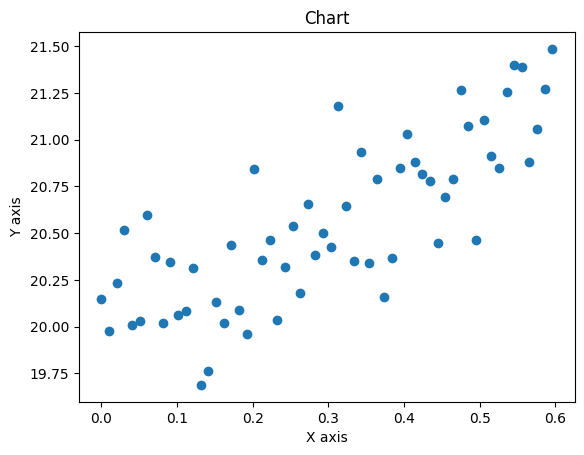

In [3]:
plt.plot(x, y, 'o')
plt.title('Chart')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

In [5]:
def draw_line(a, b, title='Chart'):
    x_line = np.linspace(np.min(x), np.max(x), 2)  # finiding bounds to draw a line
    y_line = a + b * x_line
    
    plt.plot(x, y, 'o')
    plt.plot(x_line, y_line)
    plt.title(title)
    plt.show()

In [6]:
def G(a, b):
    dists_squared = np.empty(0)
    for x_point, y_point in zip(x, y):  # going through x and y coordinate of each point
        y_line = a + b * x_point  # getting y coodinate on line on given x
        y_point = y_point  # y coordinate of current point
    
        dist = y_point - y_line  # distance between point and line on given x coordinate
        dists_squared = np.append(dists_squared, dist * dist)
    
    return np.sum(dists_squared) / len(x)  # or len(y)
    # or without / len(x)
    # but with coefficient >= 0.016 and same accuracy method loses stability

$$ MSE = \frac{1}{n} \sum_{i=1}^n(Y_i - \hat{Y_i})^2 $$

$n$ - number of dots / elements 

$Y_i$ - real value

$\hat{Y_i}$ - predictable value




In [7]:
# numerical differentianiation | central differentiation formula
def d_cent_diff(G, a, b, step=0.001, respect='a'):
    if respect == 'a':
        return (G(a + step, b) - G(a - step, b)) / (2 * step)
    elif respect == 'b':
        return (G(a, b + step) - G(a, b - step)) / (2 * step)
    else:
        return None

In [8]:
# gradient compute
def gradient(G, diff_func, a, b, step=0.001):
    grad = np.empty(0)

    # differentiate by first coordinate
    d1 = diff_func(G, a, b, step, respect='a')
    grad = np.append(grad, d1)

    # differentiate by second coordinate
    d2 = diff_func(G, a, b, step, respect='b')
    grad = np.append(grad, d2)
    
    return grad

In [9]:
def fastest_descent(G, diff_func, grad_func, a, b, coefficient=0.01, acc=0.001, max_iter=100):
    iterations = 0
    all_func_values = []

    while True:  
        gradient_values = grad_func(G, diff_func, a, b)

        a_new = a - coefficient * gradient_values[0]
        b_new = b - coefficient * gradient_values[1]

        if (abs(a_new - a) <= acc and abs(b_new - b) <= acc):
            print('Accuracy cap reached.')
            break

        if iterations >= max_iter:
            print('Iteration count cap reached.')
            break

        a, b = a_new, b_new
        func_value = G(a, b)
        all_func_values.append(func_value)
        iterations += 1
        
        print(f'a: {a}')
        print(f'b: {b}')
        print(f'Loss func value: {func_value}')
        print(f'Iteration: {iterations}')
        draw_line(a, b)
        print('-----------------------------------------------------------------------')

    return a_new, b_new, all_func_values

a: 23.53704839233802
b: -5.08163069662033
Loss func value: 3.768960344384934
Iteration: 1


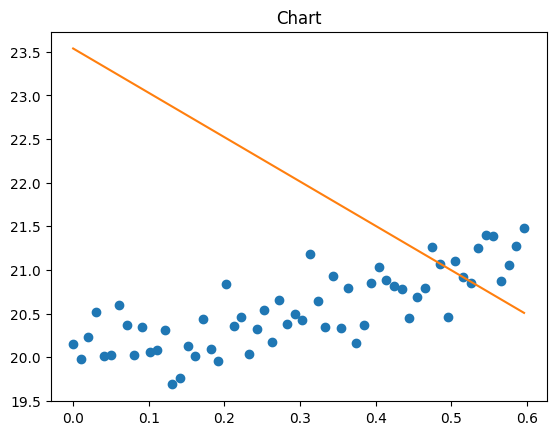

-----------------------------------------------------------------------
a: 20.88517694909247
b: -5.482939252967032
Loss func value: 3.4620966131610413
Iteration: 2


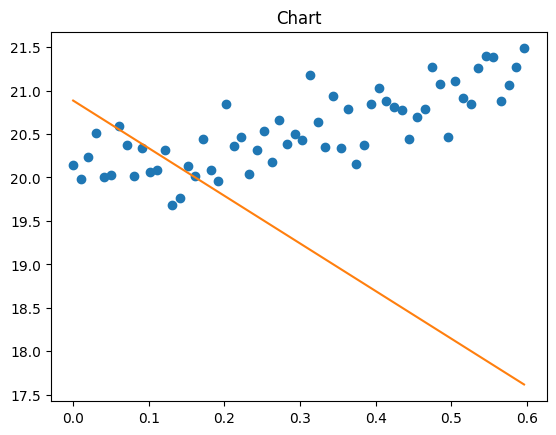

-----------------------------------------------------------------------
a: 23.221921420280484
b: -4.375636524523261
Loss func value: 3.181458684259586
Iteration: 3


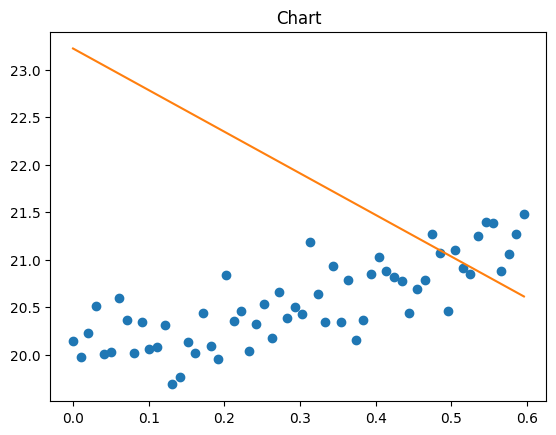

-----------------------------------------------------------------------
a: 20.75860892534041
b: -4.759645269144206
Loss func value: 2.924743295903236
Iteration: 4


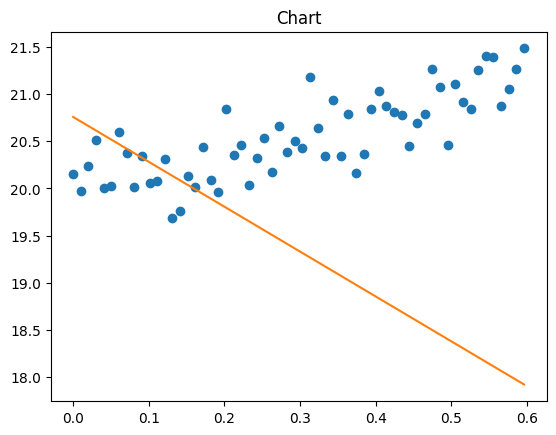

-----------------------------------------------------------------------
a: 22.935227247958586
b: -3.7398967366049733
Loss func value: 2.6898544473232873
Iteration: 5


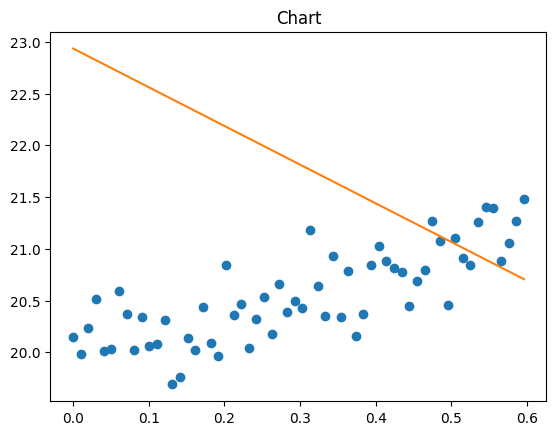

-----------------------------------------------------------------------
a: 20.64697655876998
b: -4.106757855556918
Loss func value: 2.474884358508456
Iteration: 6


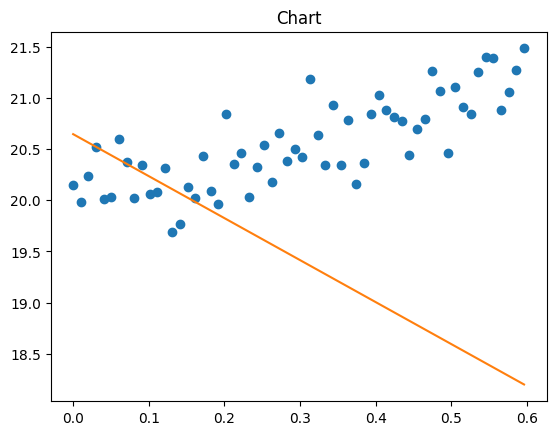

-----------------------------------------------------------------------
a: 22.674348073927305
b: -3.167443622723008
Loss func value: 2.2780962088775563
Iteration: 7


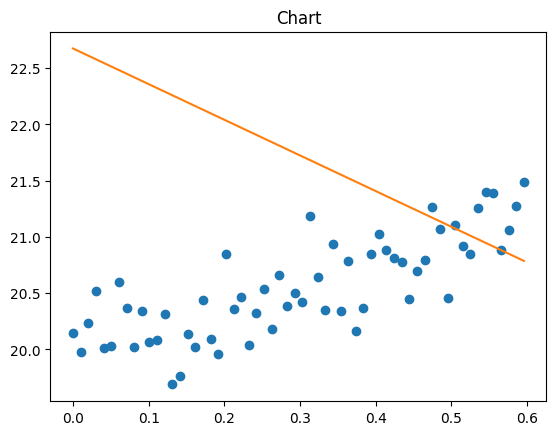

-----------------------------------------------------------------------
a: 20.548636864185273
b: -3.5174026157488862
Loss func value: 2.0979084864329627
Iteration: 8


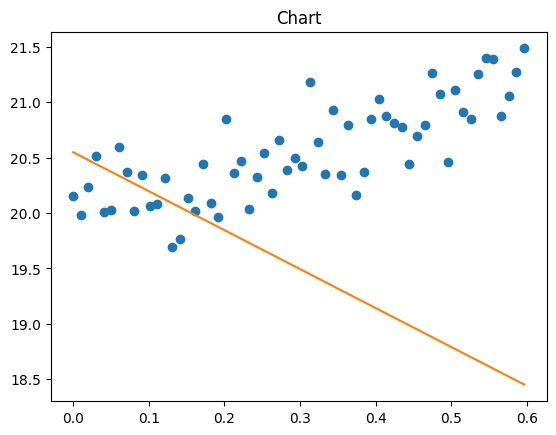

-----------------------------------------------------------------------
a: 22.43691111006126
b: -2.6519989023676898
Loss func value: 1.9328807950994564
Iteration: 9


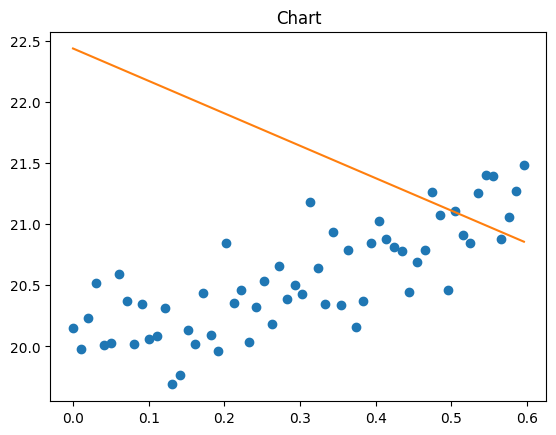

-----------------------------------------------------------------------
a: 20.46212063072393
b: -2.985377836128043
Loss func value: 1.7817009824590826
Iteration: 10


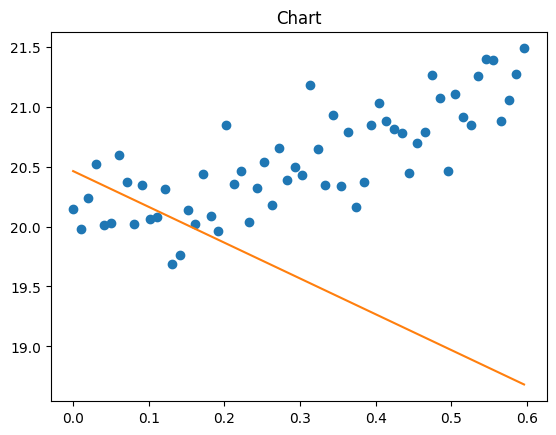

-----------------------------------------------------------------------
a: 22.220765351397205
b: -2.1879056201071316
Loss func value: 1.643173463291372
Iteration: 11


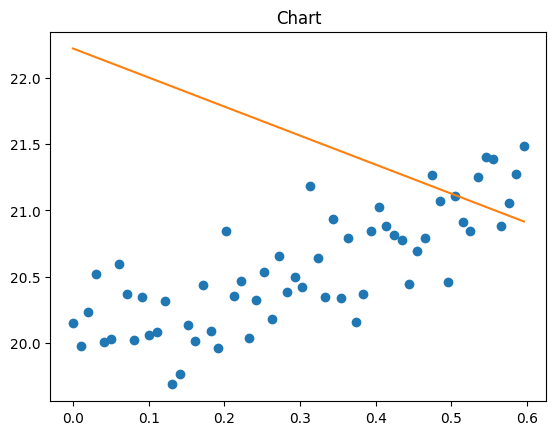

-----------------------------------------------------------------------
a: 20.386114477170164
b: -2.5050885577147723
Loss func value: 1.516208626202607
Iteration: 12


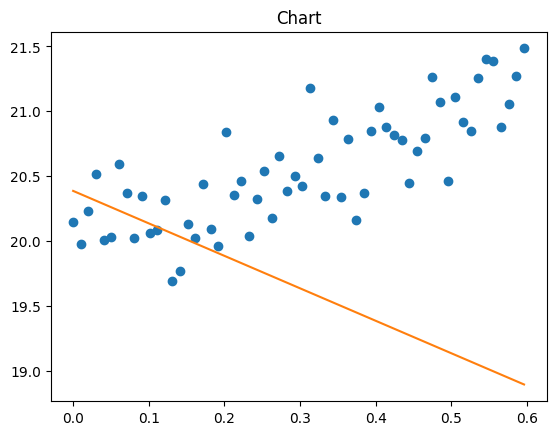

-----------------------------------------------------------------------
a: 22.023960570364004
b: -1.7700667608862113
Loss func value: 1.3998132213634356
Iteration: 13


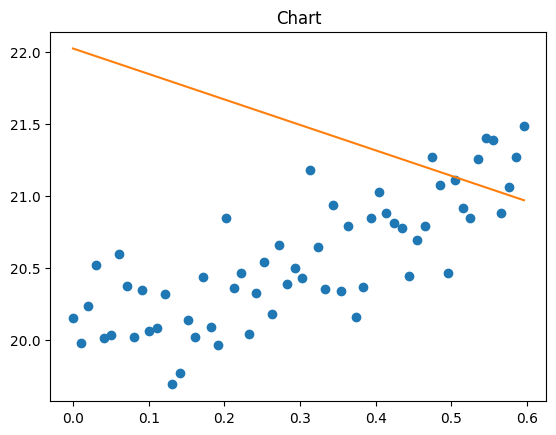

-----------------------------------------------------------------------
a: 20.319444732051167
b: -2.0714871166920483
Loss func value: 1.2930816371058496
Iteration: 14


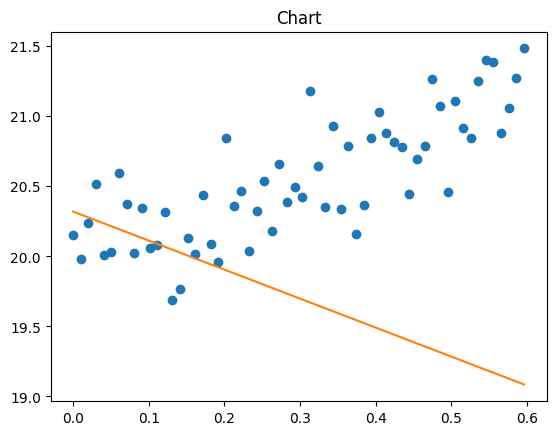

-----------------------------------------------------------------------
a: 21.844728320819435
b: -1.3938899226705752
Loss func value: 1.1951879818921476
Iteration: 15


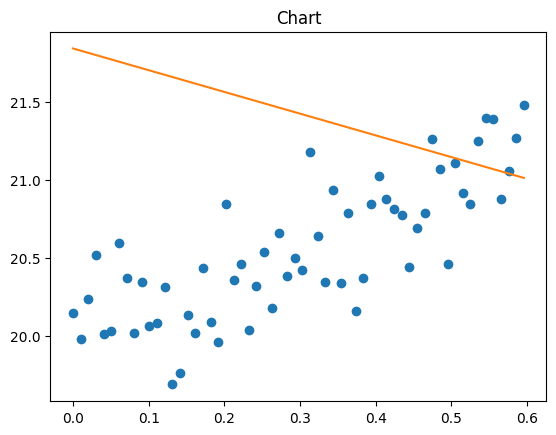

-----------------------------------------------------------------------
a: 20.261062954826055
b: -1.6800195185241988
Loss func value: 1.1053788961147173
Iteration: 16


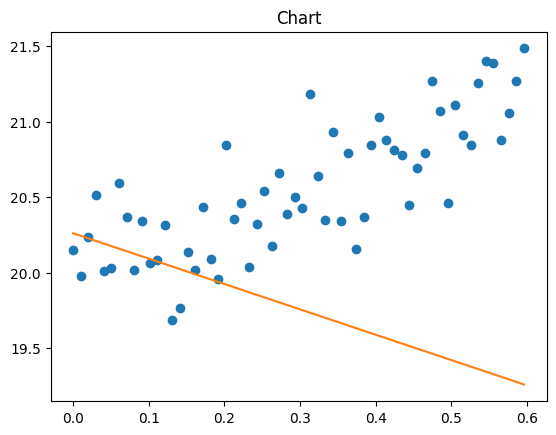

-----------------------------------------------------------------------
a: 21.681464758127497
b: -1.0552374492173926
Loss func value: 1.0229670253544763
Iteration: 17


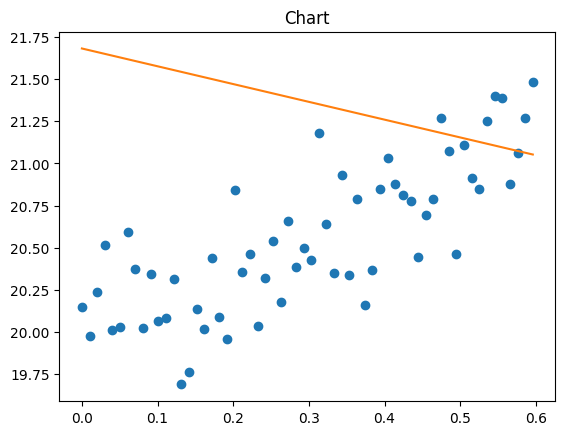

-----------------------------------------------------------------------
a: 20.210032932854613
b: -1.3265770728351982
Loss func value: 0.9473250932211676
Iteration: 18


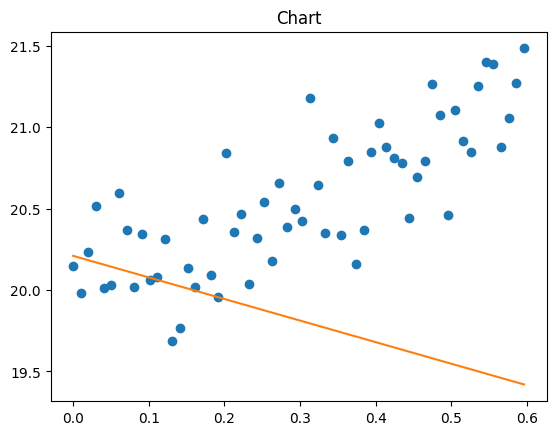

-----------------------------------------------------------------------
a: 21.53271510028967
b: -0.7503814845861749
Loss func value: 0.8778805177472997
Iteration: 19


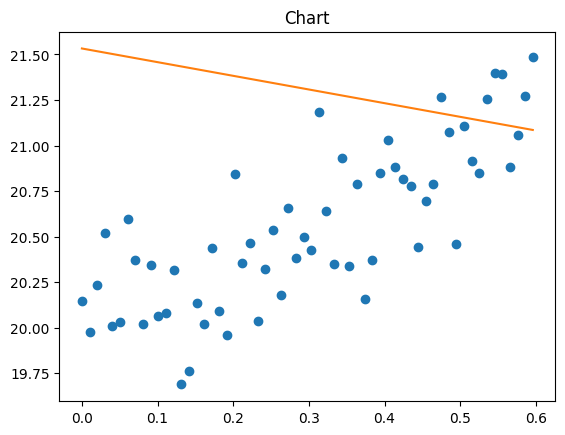

-----------------------------------------------------------------------
a: 20.16551900536841
b: -1.0074527725253617
Loss func value: 0.8141105206343616
Iteration: 20


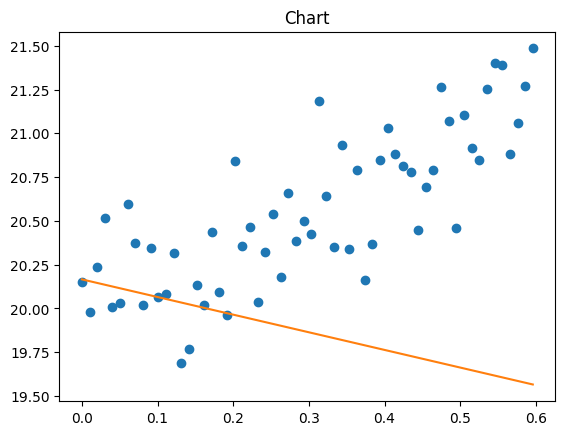

-----------------------------------------------------------------------
a: 21.39715957211228
b: -0.47596346407861967
Loss func value: 0.7555376834243753
Iteration: 21


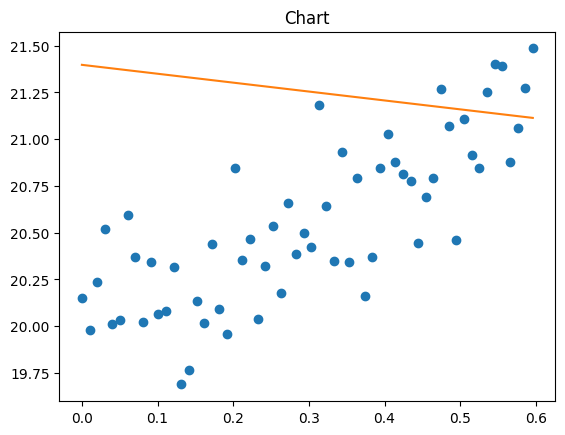

-----------------------------------------------------------------------
a: 20.126775580547108
b: -0.7193019513360859
Loss func value: 0.7017259090216732
Iteration: 22


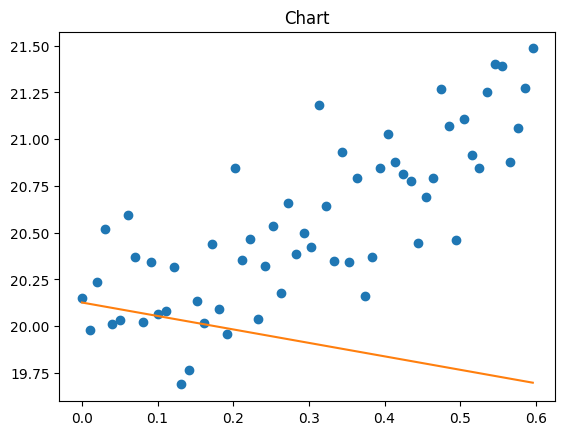

-----------------------------------------------------------------------
a: 21.273600689694977
b: -0.2289576040901058
Loss func value: 0.6522767509078765
Iteration: 23


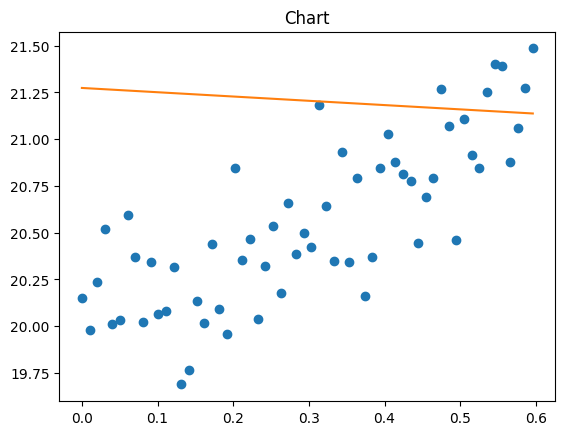

-----------------------------------------------------------------------
a: 20.09313772521474
b: -0.45910679983811975
Loss func value: 0.6068260759466363
Iteration: 24


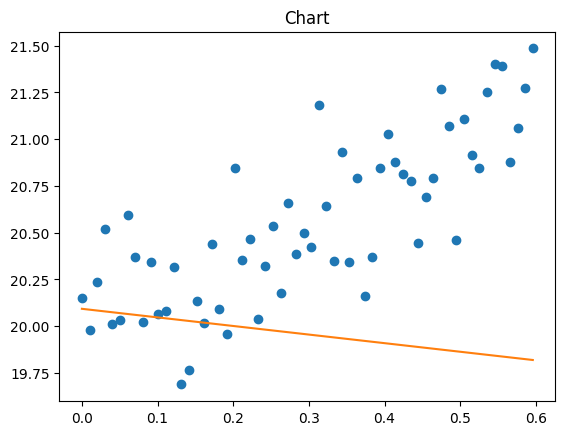

-----------------------------------------------------------------------
a: 21.16095175633919
b: -0.006637996506301702
Loss func value: 0.5650410298789948
Iteration: 25


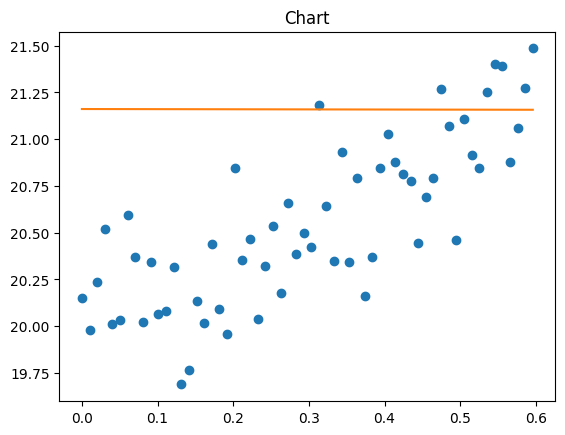

-----------------------------------------------------------------------
a: 20.064012718740877
b: -0.22414436108339308
Loss func value: 0.5266172775219583
Iteration: 26


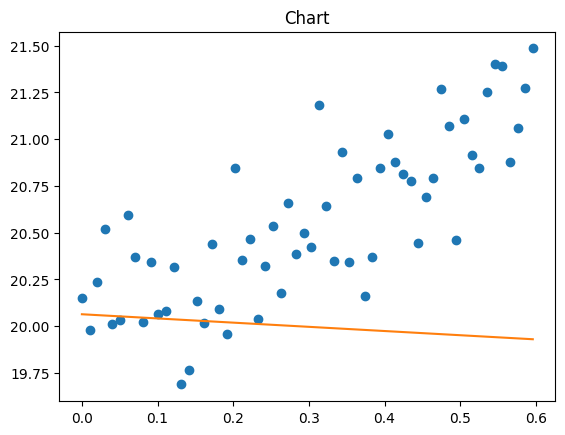

-----------------------------------------------------------------------
a: 21.05822645345877
b: 0.19345104787872502
Loss func value: 0.491276492309857
Iteration: 27


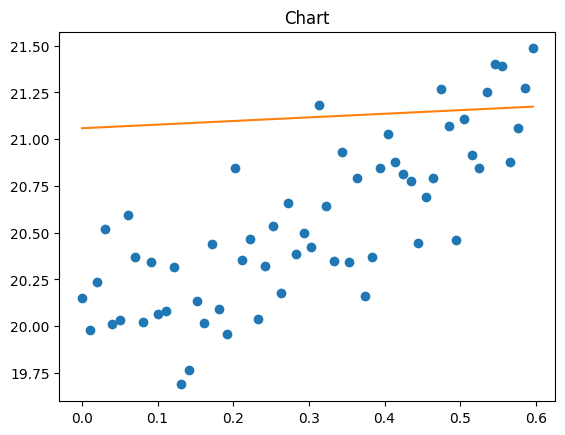

-----------------------------------------------------------------------
a: 20.03887247360241
b: -0.011957664364543485
Loss func value: 0.4587640721931131
Iteration: 28


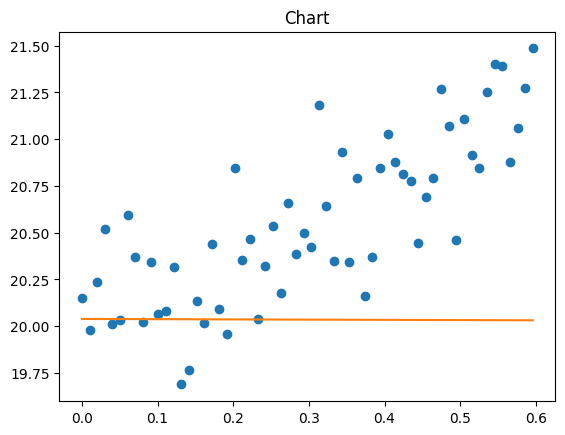

-----------------------------------------------------------------------
a: 20.964529421329416
b: 0.37352172739217215
Loss func value: 0.42884706106854764
Iteration: 29


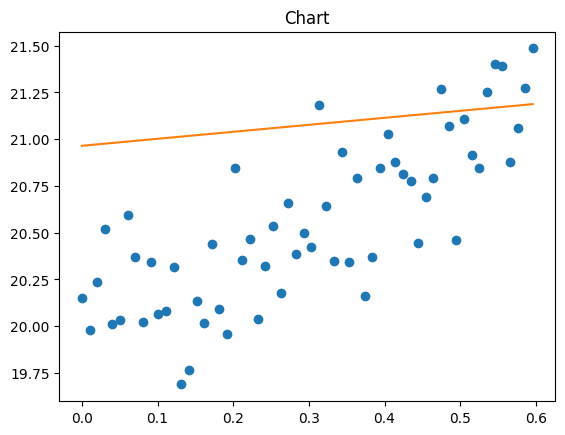

-----------------------------------------------------------------------
a: 20.01724673483964
b: 0.1796703109289245
Loss func value: 0.4013122568575883
Iteration: 30


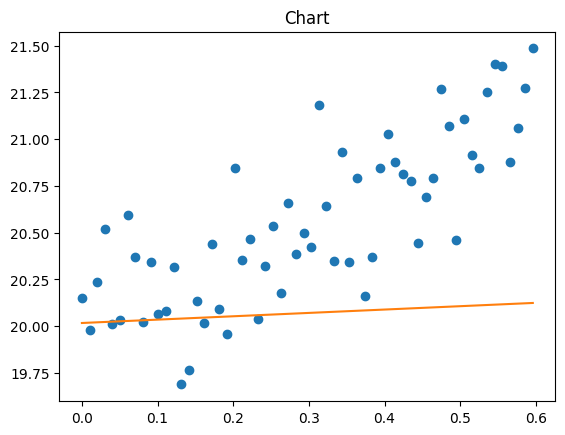

-----------------------------------------------------------------------
a: 20.87904773468209
b: 0.535566837849379
Loss func value: 0.3759644891180131
Iteration: 31


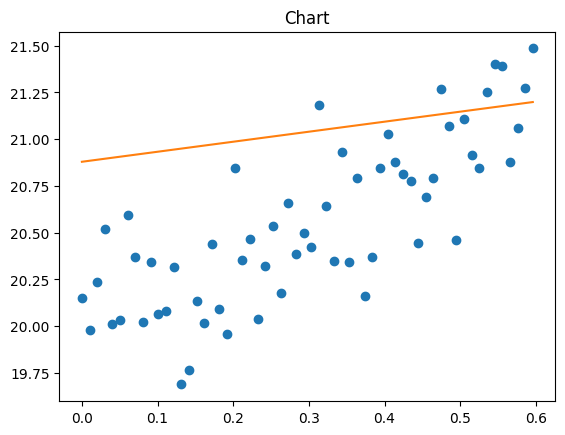

-----------------------------------------------------------------------
a: 19.998716979457786
b: 0.35274011910889536
Loss func value: 0.35262505066808936
Iteration: 32


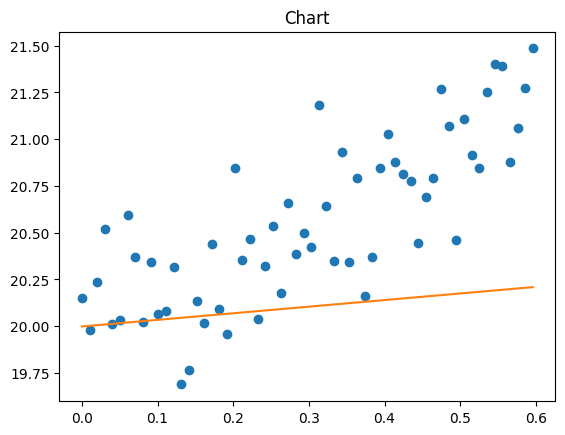

-----------------------------------------------------------------------
a: 20.80104318732736
b: 0.6813814816683074
Loss func value: 0.33113026914901733
Iteration: 33


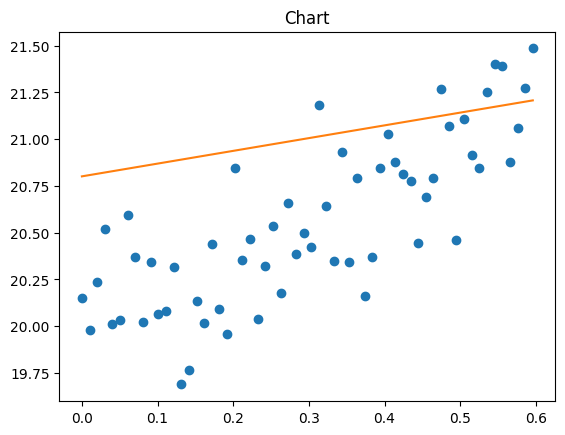

-----------------------------------------------------------------------
a: 19.982910944747832
b: 0.5090570301162296
Loss func value: 0.31133020576274817
Iteration: 34


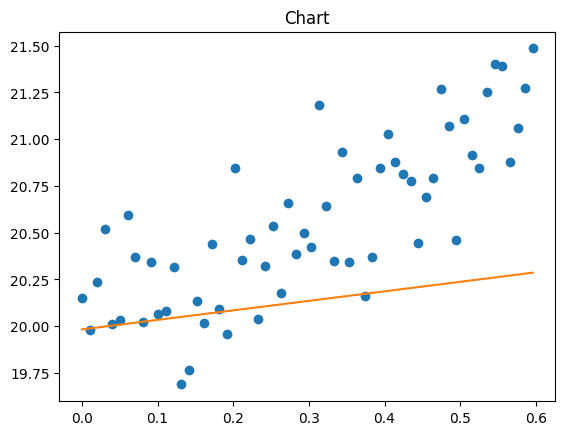

-----------------------------------------------------------------------
a: 20.729845308282243
b: 0.8125826324688574
Loss func value: 0.29308746960446985
Iteration: 35


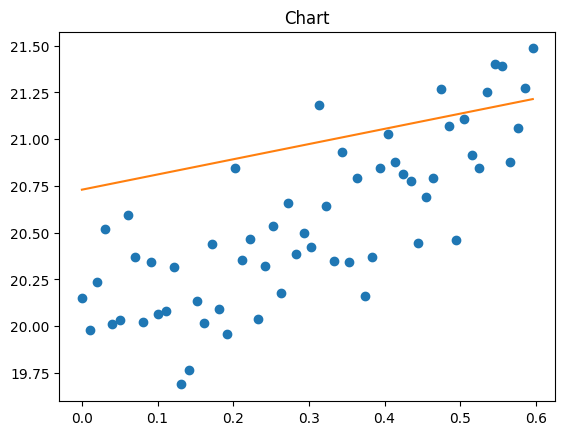

-----------------------------------------------------------------------
a: 19.96949772164549
b: 0.6502501354541241
Loss func value: 0.2762761370867475
Iteration: 36


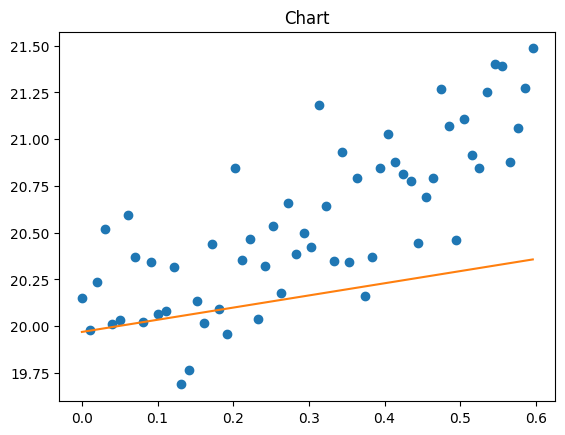

-----------------------------------------------------------------------
a: 20.664845039355537
b: 0.9306267667583291
Loss func value: 0.26078076692193264
Iteration: 37


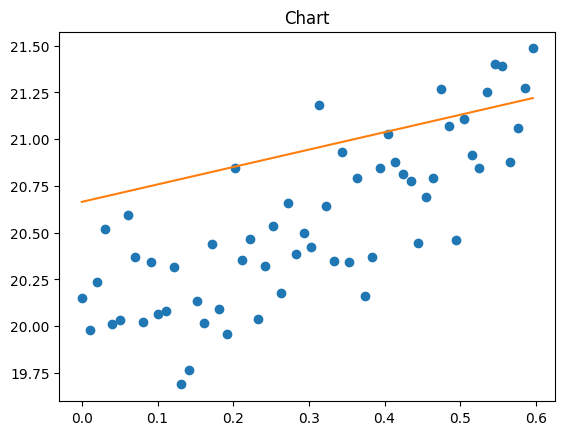

-----------------------------------------------------------------------
a: 19.958183355668066
b: 0.7777895818206333
Loss func value: 0.24649550201383874
Iteration: 38


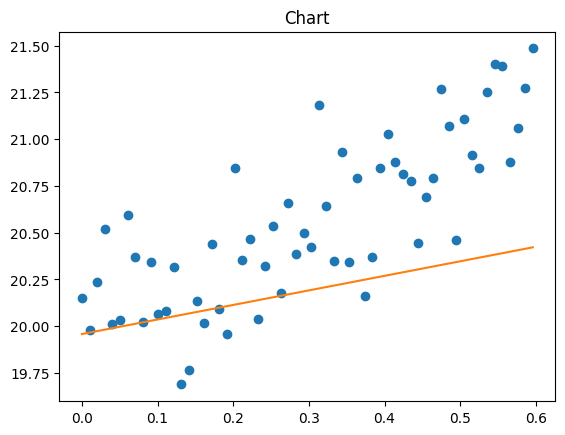

-----------------------------------------------------------------------
a: 20.605489010904517
b: 1.036825753439519
Loss func value: 0.23332325040542895
Iteration: 39


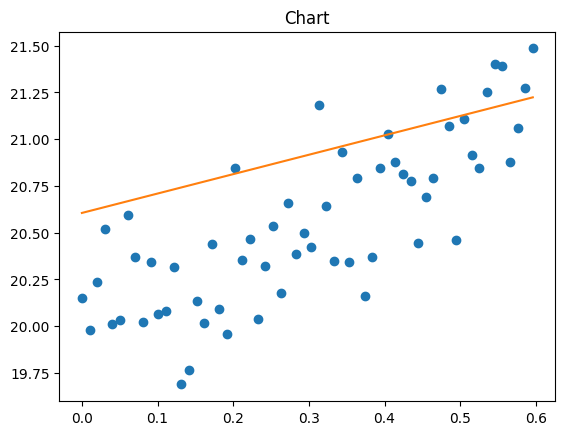

-----------------------------------------------------------------------
a: 19.94870690375451
b: 0.893002116131363
Loss func value: 0.221174938155344
Iteration: 40


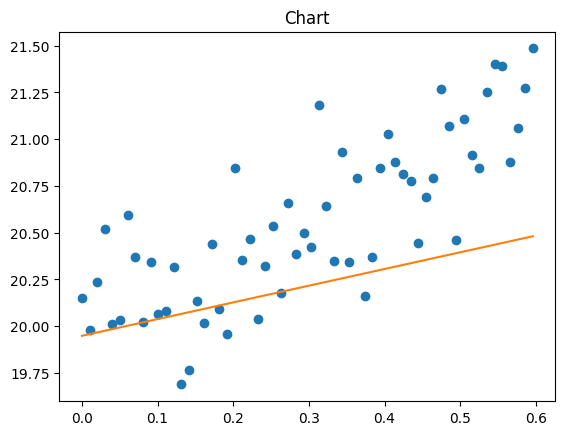

-----------------------------------------------------------------------
a: 20.55127435857771
b: 1.1323611730727967
Loss func value: 0.2099688276707157
Iteration: 41


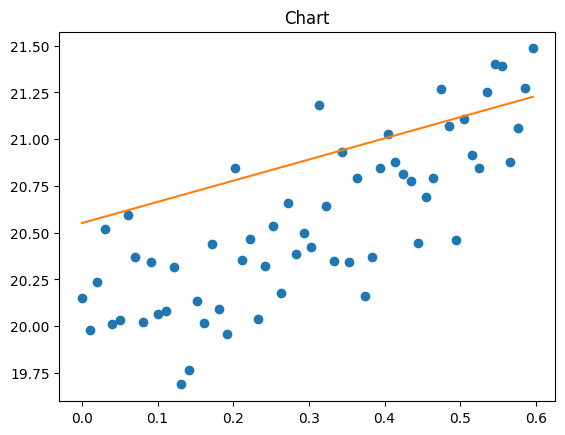

-----------------------------------------------------------------------
a: 19.940836900539992
b: 0.9970851075883516
Loss func value: 0.1996298956184464
Iteration: 42


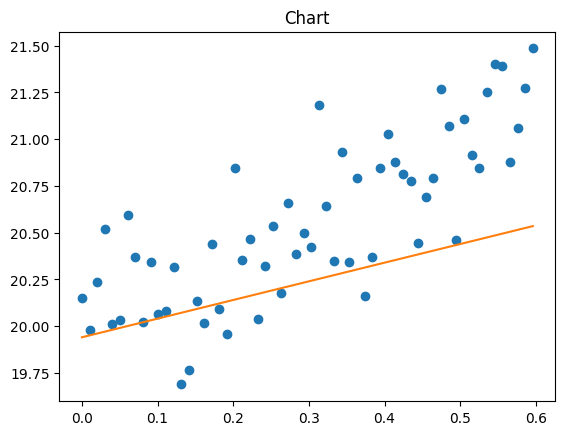

-----------------------------------------------------------------------
a: 20.501744029367792
b: 1.2182972218699146
Loss func value: 0.19008926507667923
Iteration: 43


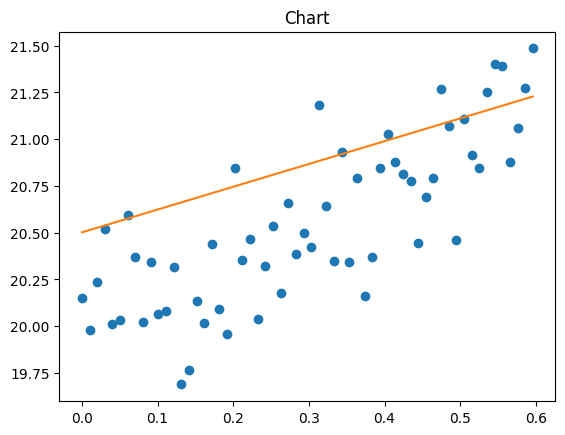

-----------------------------------------------------------------------
a: 19.9343681922804
b: 1.0911191961816284
Loss func value: 0.18128368707600778
Iteration: 44


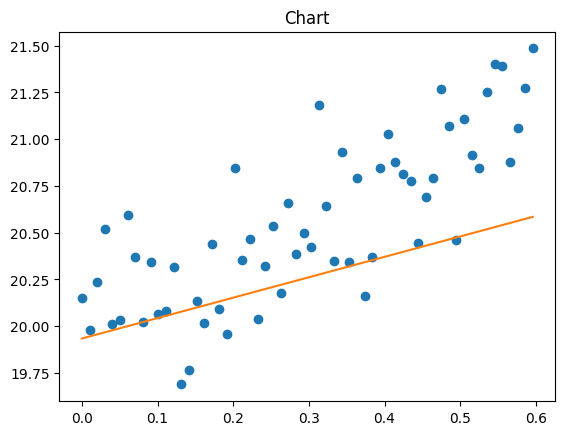

-----------------------------------------------------------------------
a: 20.45648253027537
b: 1.2955923401179712
Loss func value: 0.17315506712401454
Iteration: 45


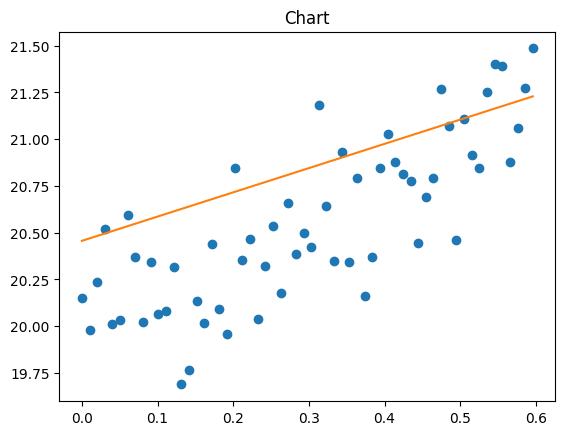

-----------------------------------------------------------------------
a: 19.929119100857715
b: 1.1760797023506675
Loss func value: 0.16565003270839085
Iteration: 46


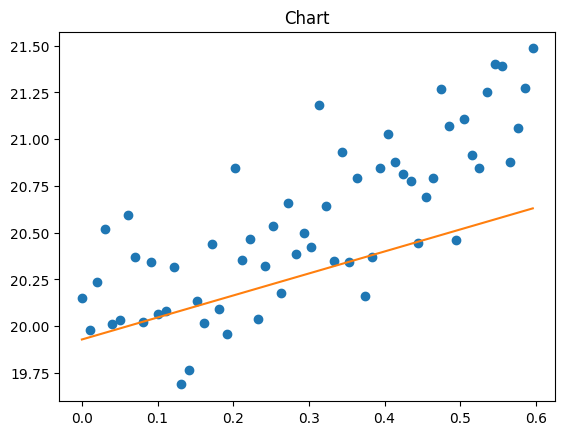

-----------------------------------------------------------------------
a: 20.415112077377366
b: 1.3651096909514717
Loss func value: 0.15871953813809045
Iteration: 47


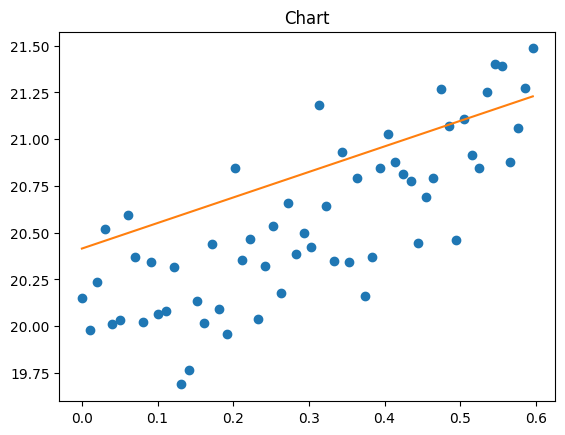

-----------------------------------------------------------------------
a: 19.924928884092722
b: 1.2528469192974763
Loss func value: 0.15231850341347064
Iteration: 48


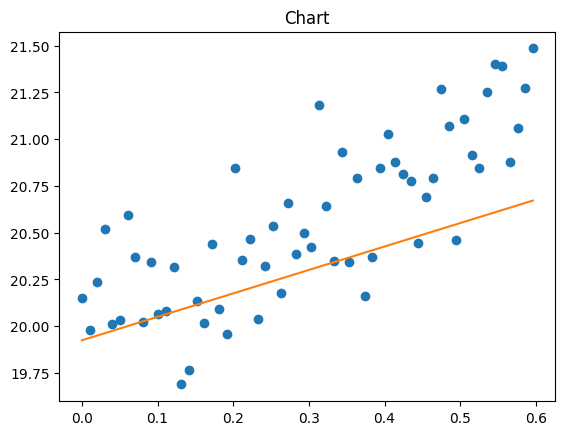

-----------------------------------------------------------------------
a: 20.37728910715419
b: 1.4276266029759748
Loss func value: 0.1464054841158254
Iteration: 49


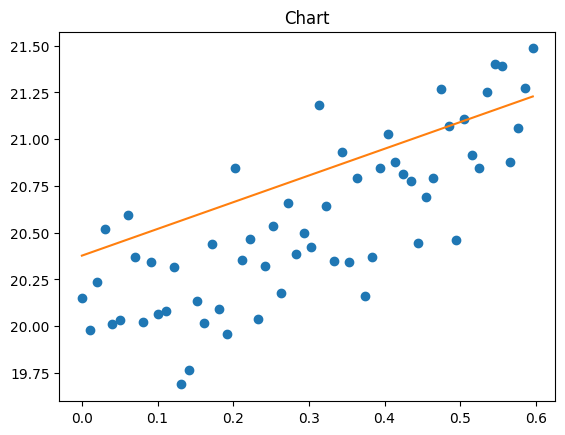

-----------------------------------------------------------------------
a: 19.92165546200363
b: 1.3222153975265205
Loss func value: 0.14094236958024903
Iteration: 50


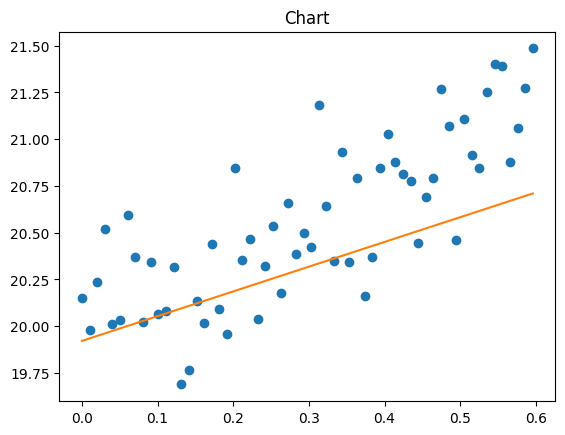

-----------------------------------------------------------------------
a: 20.342701115593524
b: 1.4838430790508952
Loss func value: 0.13589410686107906
Iteration: 51


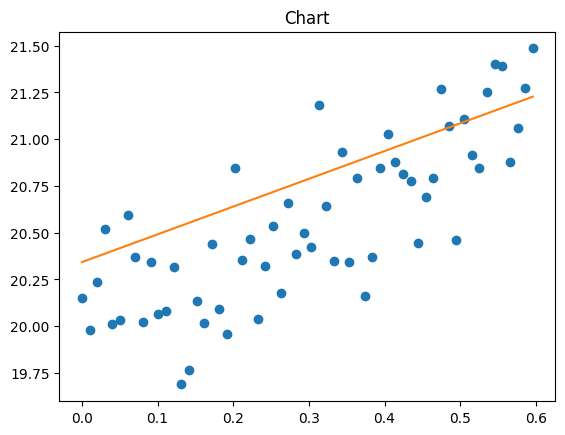

-----------------------------------------------------------------------
a: 19.919173381721112
b: 1.3849023204208433
Loss func value: 0.1312284482258839
Iteration: 52


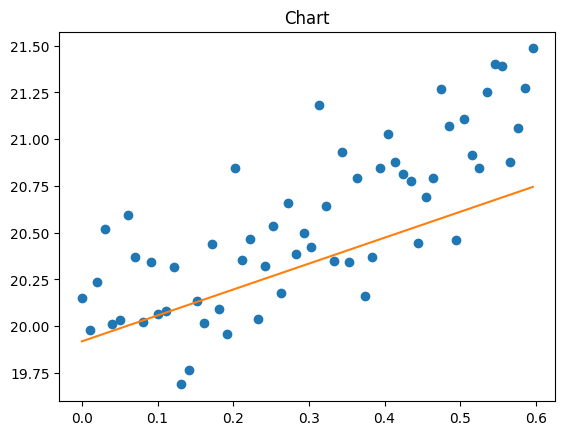

-----------------------------------------------------------------------
a: 20.311063793903436
b: 1.5343894634434407
Loss func value: 0.12691572011611926
Iteration: 53


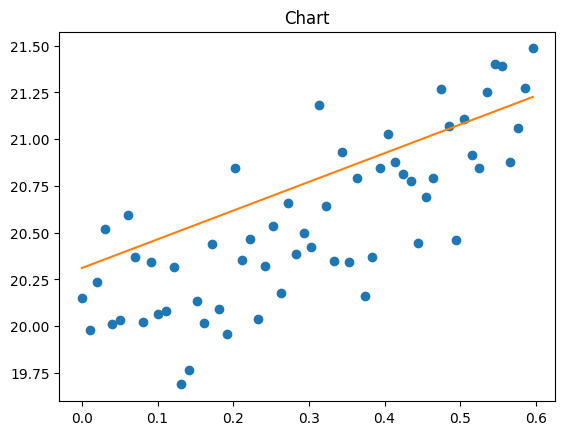

-----------------------------------------------------------------------
a: 19.917371996535394
b: 1.4415550599759674
Loss func value: 0.1229286116986536
Iteration: 54


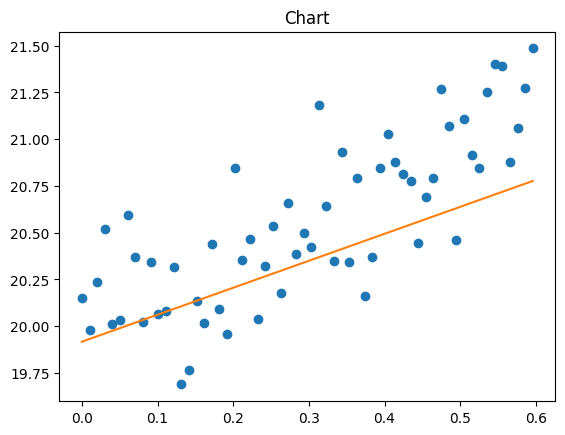

-----------------------------------------------------------------------
a: 20.282118432654226
b: 1.5798333504792514
Loss func value: 0.1192419812995781
Iteration: 55


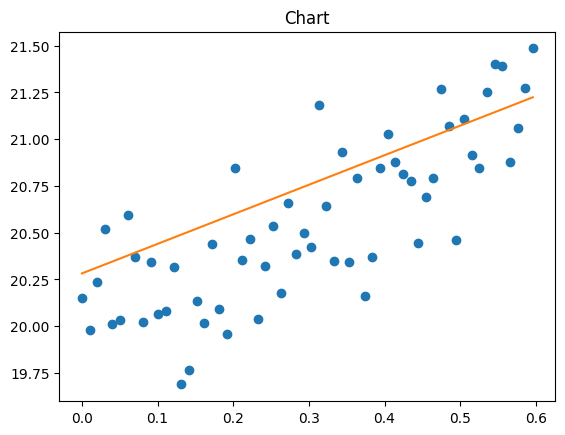

-----------------------------------------------------------------------
a: 19.916153837033793
b: 1.4927579930568537
Loss func value: 0.11583267916544102
Iteration: 56


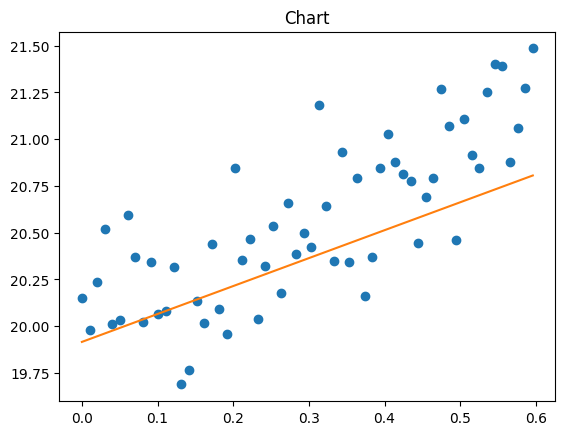

-----------------------------------------------------------------------
a: 20.255629568875744
b: 1.620685809601861
Loss func value: 0.11267938513510796
Iteration: 57


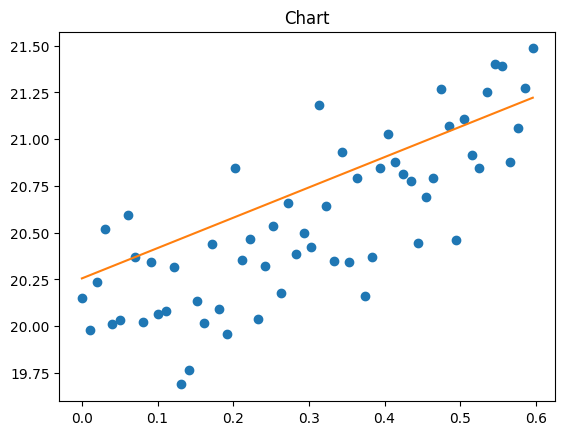

-----------------------------------------------------------------------
a: 19.91543315452721
b: 1.539038650663985
Loss func value: 0.10976245993171688
Iteration: 58


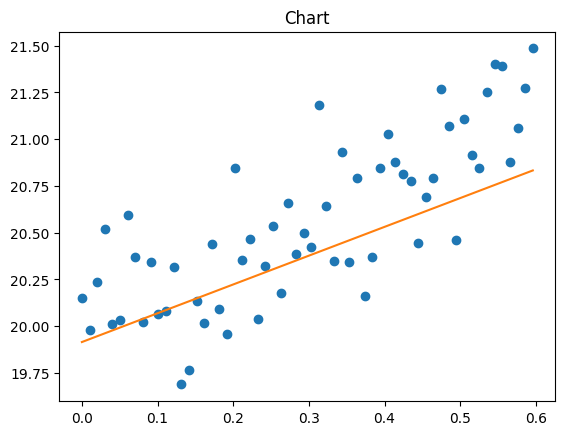

-----------------------------------------------------------------------
a: 20.231382853073505
b: 1.657406994374779
Loss func value: 0.10706380889911553
Iteration: 59


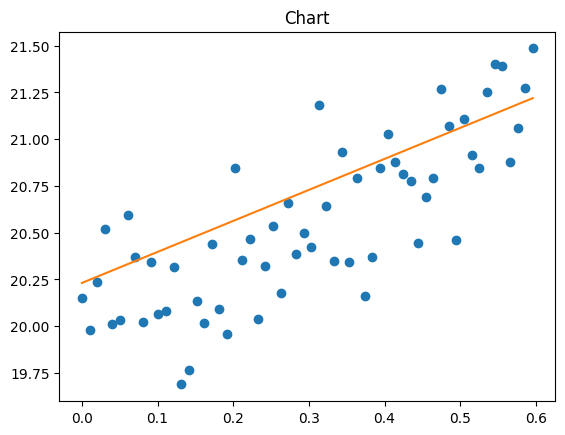

-----------------------------------------------------------------------
a: 19.915134618972647
b: 1.5808732655780904
Loss func value: 0.10456675711092075
Iteration: 60


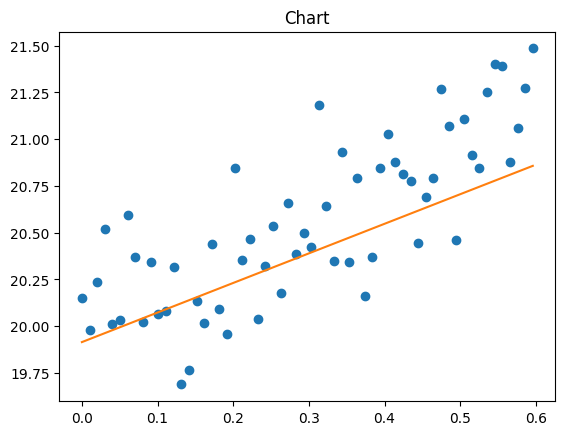

-----------------------------------------------------------------------
a: 20.20918311533594
b: 1.690411196286445
Loss func value: 0.10225593487558853
Iteration: 61


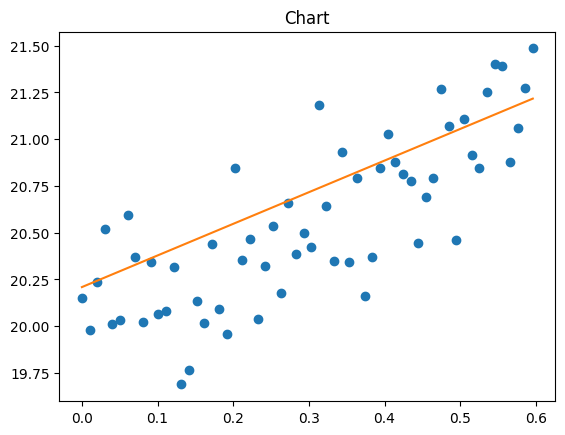

-----------------------------------------------------------------------
a: 19.9151921554101
b: 1.6186917773383716
Loss func value: 0.10011717274654655
Iteration: 62


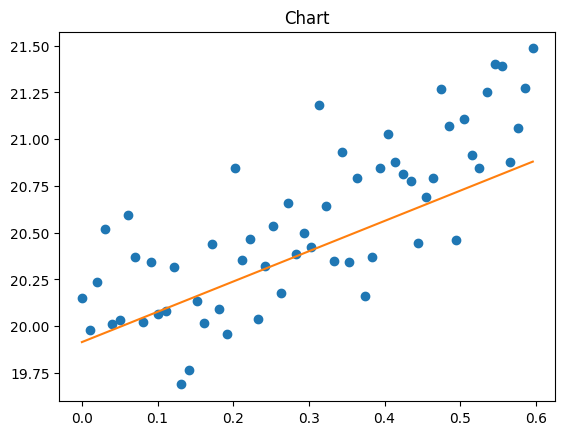

-----------------------------------------------------------------------
a: 20.188852611696333
b: 1.7200713982192204
Loss func value: 0.0981374052254535
Iteration: 63


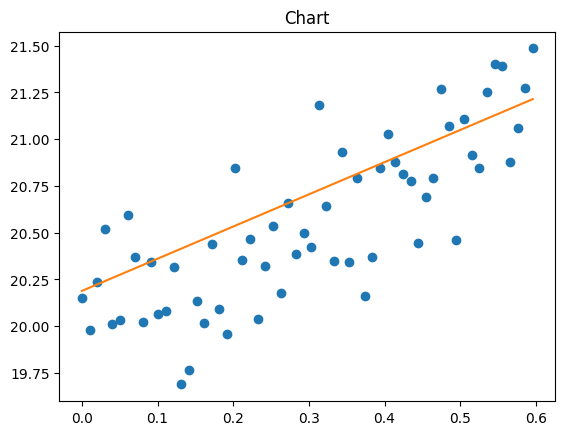

-----------------------------------------------------------------------
a: 19.915547904557847
b: 1.6528823477285939
Loss func value: 0.09630458241732757
Iteration: 64


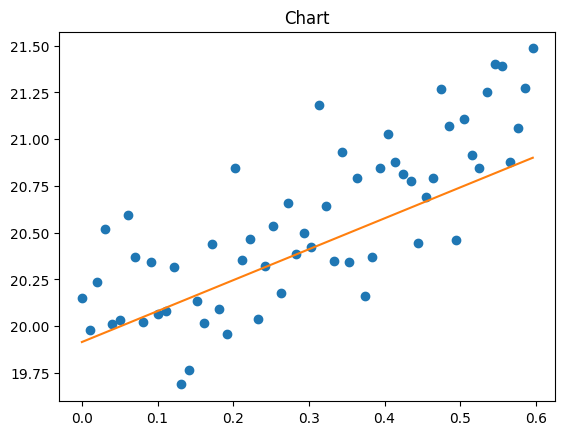

-----------------------------------------------------------------------
a: 20.170229433714272
b: 1.746723377026227
Loss func value: 0.09460758896169917
Iteration: 65


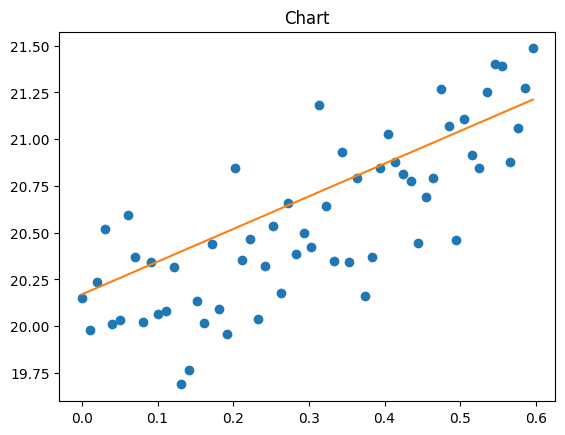

-----------------------------------------------------------------------
a: 19.916151294674332
b: 1.683795434725896
Loss func value: 0.09303616962284351
Iteration: 66


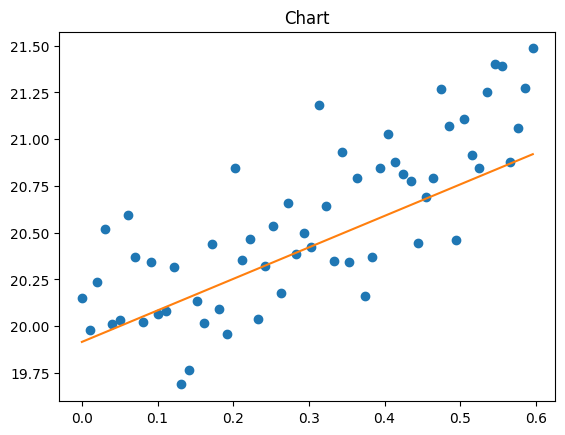

-----------------------------------------------------------------------
a: 20.153166065867975
b: 1.7706693997805176
Loss func value: 0.09158086097587978
Iteration: 67


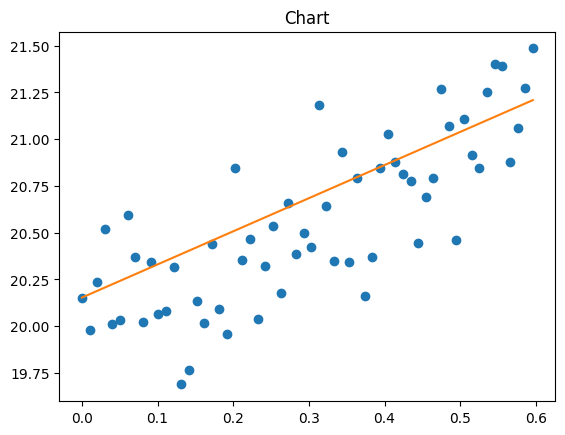

-----------------------------------------------------------------------
a: 19.916958213110448
b: 1.711747468163108
Loss func value: 0.09023292867451466
Iteration: 68


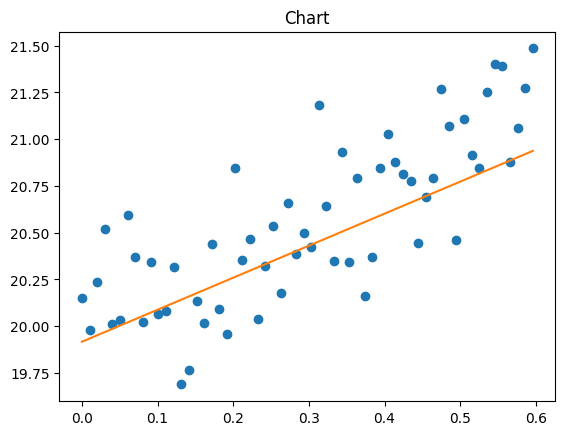

-----------------------------------------------------------------------
a: 20.137528076820896
b: 1.7921815538629677
Loss func value: 0.08898430983102855
Iteration: 69


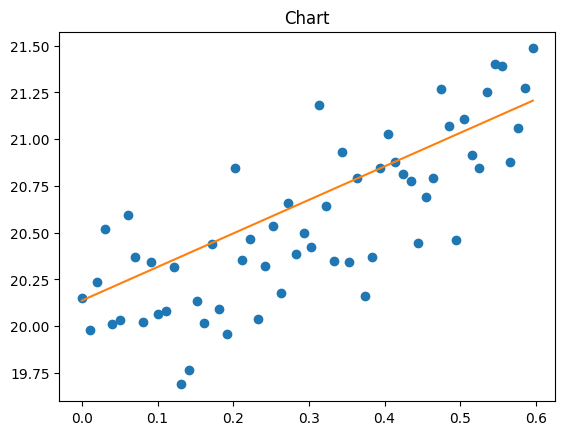

-----------------------------------------------------------------------
a: 19.917930267158436
b: 1.7370241661164278
Loss func value: 0.08782756007943728
Iteration: 70


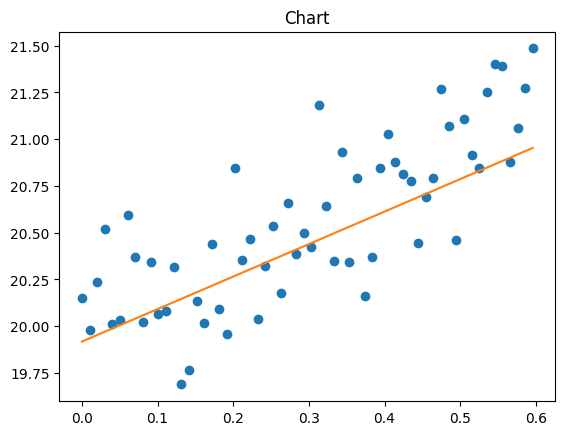

-----------------------------------------------------------------------
a: 20.12319293195299
b: 1.8115047470898795
Loss func value: 0.08675580492994736
Iteration: 71


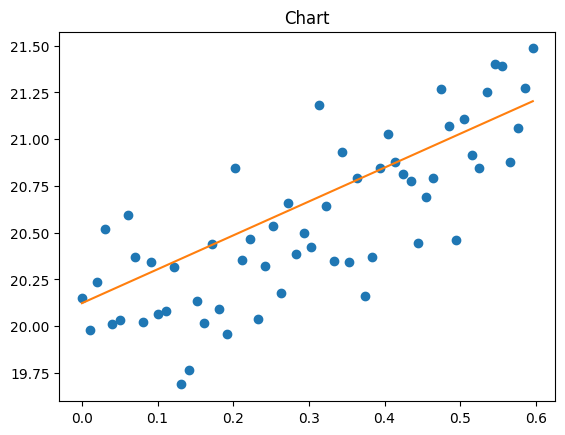

-----------------------------------------------------------------------
a: 19.91903412486745
b: 1.7598835271998599
Loss func value: 0.0857626950566208
Iteration: 72


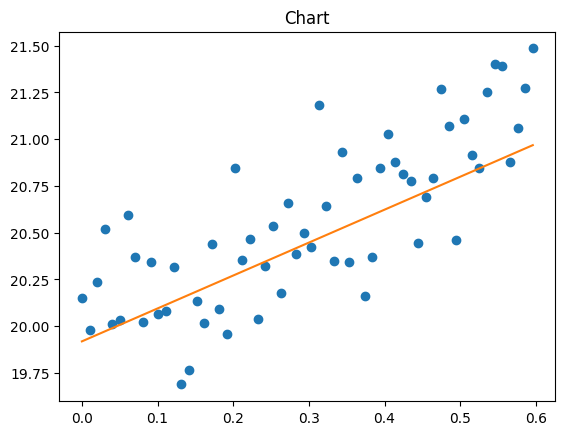

-----------------------------------------------------------------------
a: 20.11004891575009
b: 1.8288594105056206
Loss func value: 0.08484236519080057
Iteration: 73


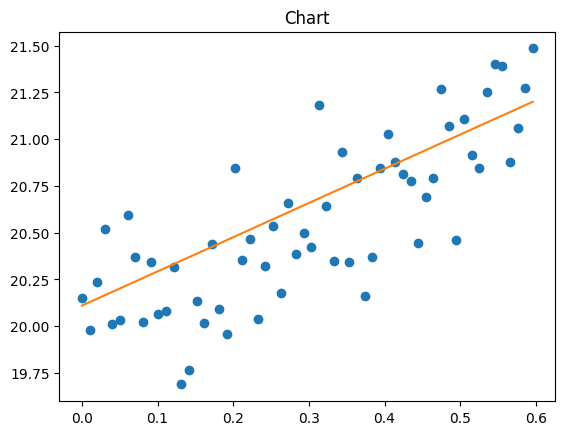

-----------------------------------------------------------------------
a: 19.92024092745226
b: 1.7805585305017442
Loss func value: 0.0839893963209965
Iteration: 74


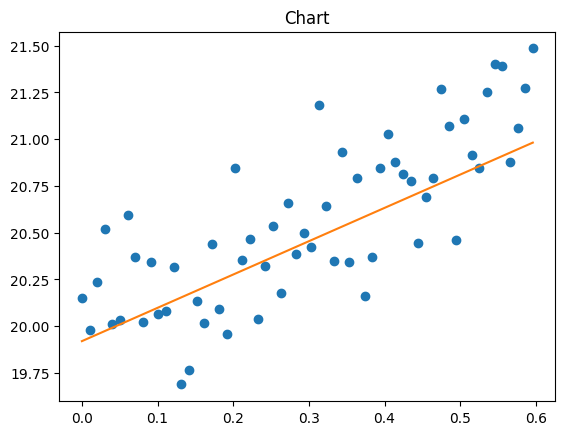

-----------------------------------------------------------------------
a: 20.097994153729413
b: 1.8444439332481772
Loss func value: 0.08319878092540334
Iteration: 75


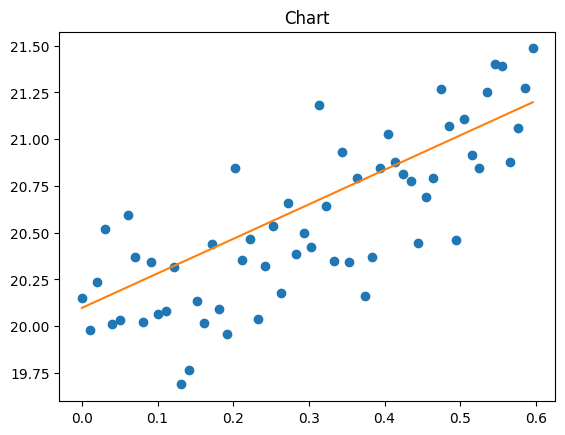

-----------------------------------------------------------------------
a: 19.92152576577961
b: 1.7992595717845743
Loss func value: 0.08246589098672426
Iteration: 76


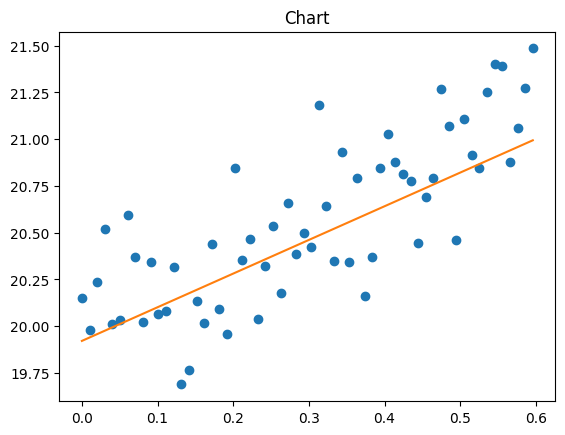

-----------------------------------------------------------------------
a: 20.086935724561275
b: 1.8584368559861988
Loss func value: 0.08178644856005189
Iteration: 77


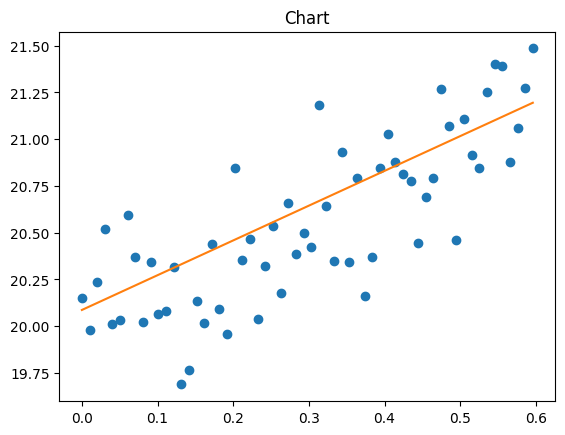

-----------------------------------------------------------------------
a: 19.922867214191037
b: 1.816176661763943
Loss func value: 0.08115649868422267
Iteration: 78


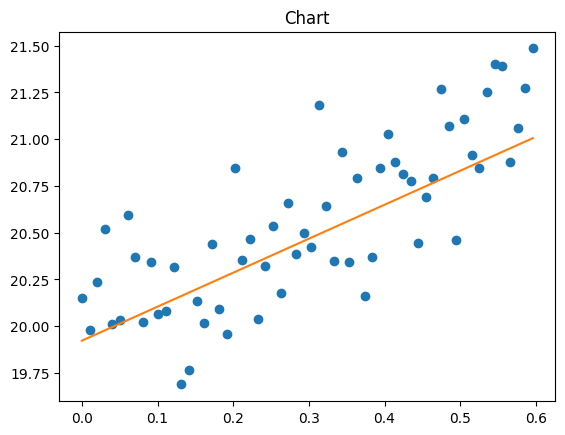

-----------------------------------------------------------------------
a: 20.076788853934094
b: 1.87099884681472
Loss func value: 0.08057238444454855
Iteration: 79


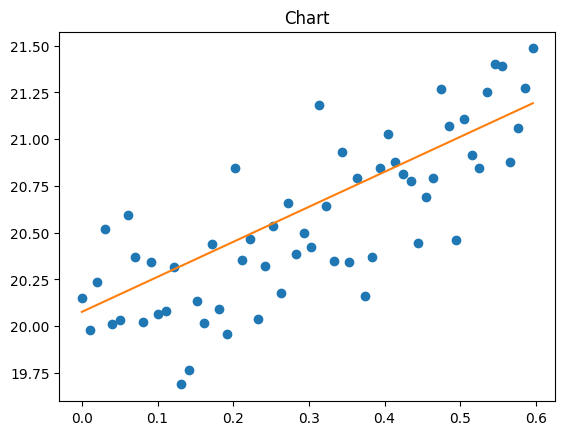

-----------------------------------------------------------------------
a: 19.92424691561204
b: 1.8314814097516863
Loss func value: 0.08003072401117613
Iteration: 80


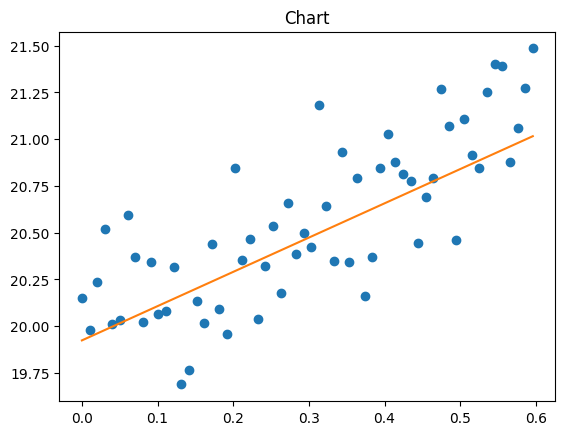

-----------------------------------------------------------------------
a: 20.067476182512955
b: 1.8822744811317753
Loss func value: 0.07952838949216569
Iteration: 81


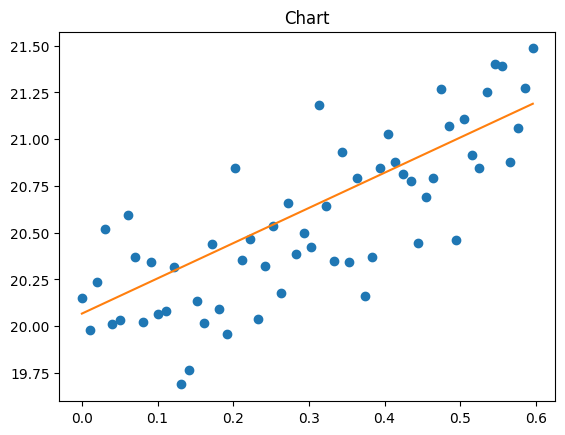

-----------------------------------------------------------------------
a: 19.92564921252435
b: 1.8453288136668538
Loss func value: 0.07906248745366053
Iteration: 82


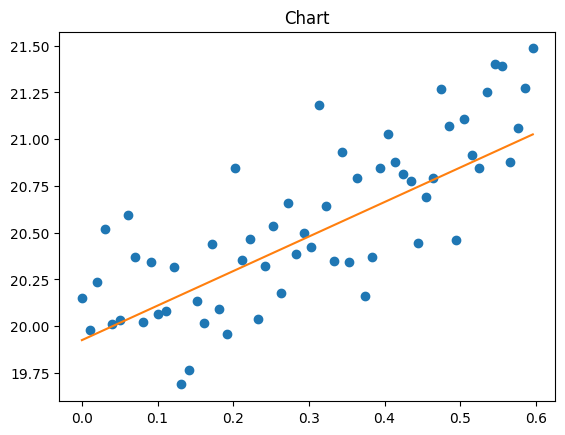

-----------------------------------------------------------------------
a: 20.05892710106495
b: 1.89239384489745
Loss func value: 0.07863034097212669
Iteration: 83


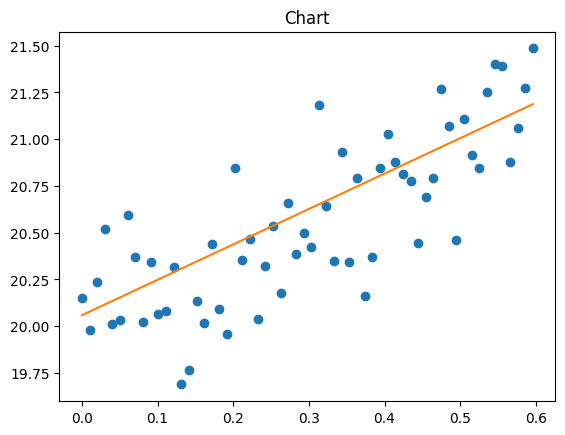

-----------------------------------------------------------------------
a: 19.927060818935715
b: 1.857858875357735
Loss func value: 0.07822947309472929
Iteration: 84


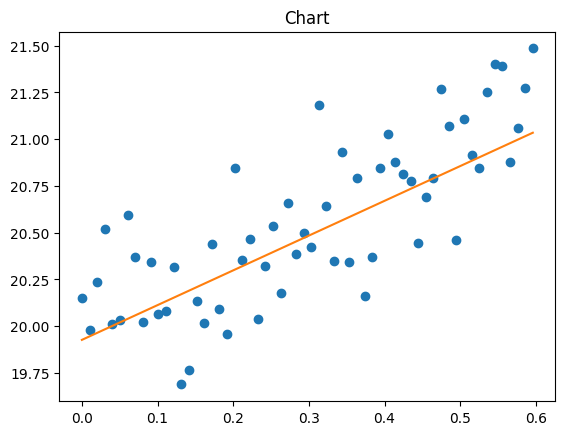

-----------------------------------------------------------------------
a: 20.051077146483443
b: 1.9014739787562203
Loss func value: 0.0778575915942852
Iteration: 85


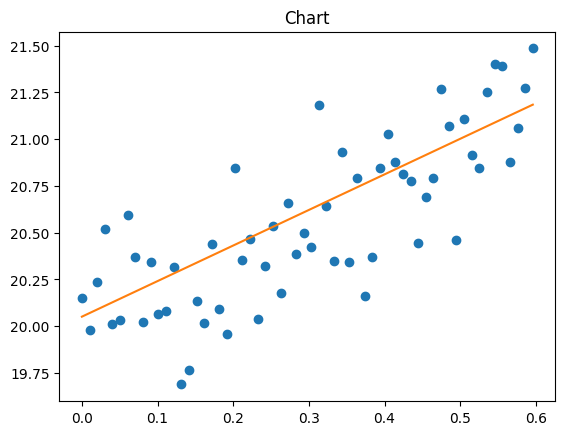

-----------------------------------------------------------------------
a: 19.928470528985773
b: 1.8691980583229528
Loss func value: 0.07751257491470699
Iteration: 86


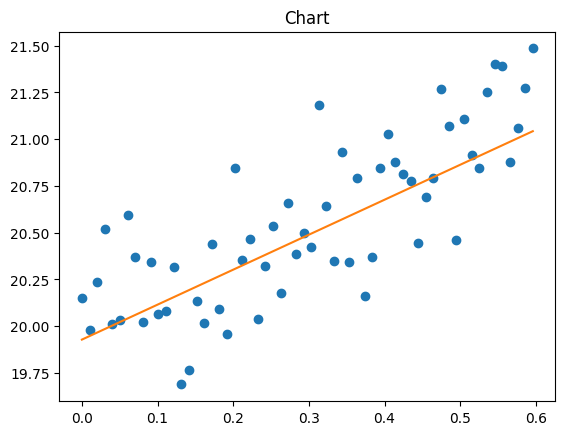

-----------------------------------------------------------------------
a: 20.043867453034782
b: 1.909620178776569
Loss func value: 0.07719245921137635
Iteration: 87


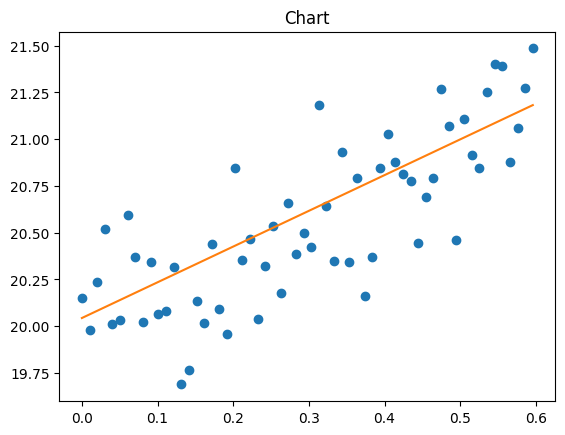

-----------------------------------------------------------------------
a: 19.929868958279265
b: 1.8794606032456644
Loss func value: 0.07689542639888997
Iteration: 88


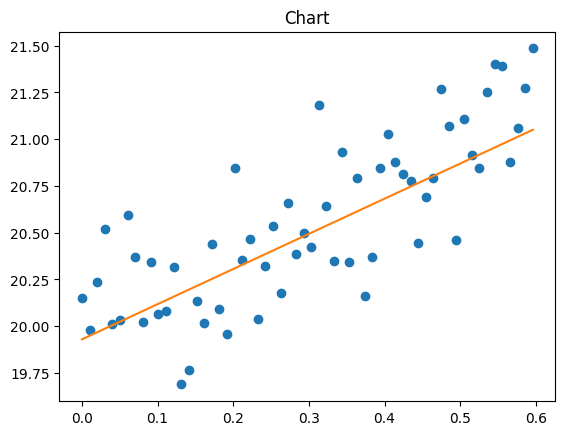

-----------------------------------------------------------------------
a: 20.037244253686897
b: 1.9169271680087063
Loss func value: 0.07661979312570061
Iteration: 89


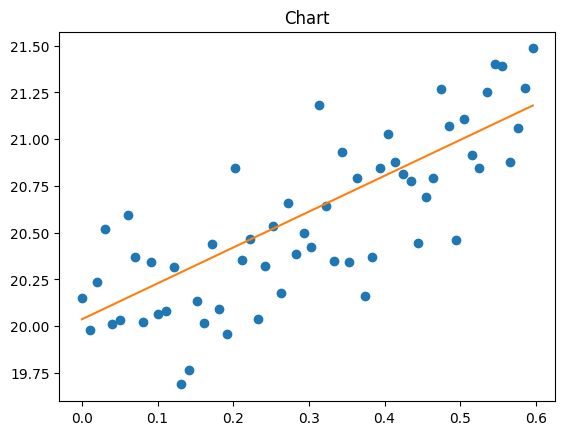

-----------------------------------------------------------------------
a: 19.931248314442165
b: 1.8887497152440527
Loss func value: 0.07636400060189535
Iteration: 90


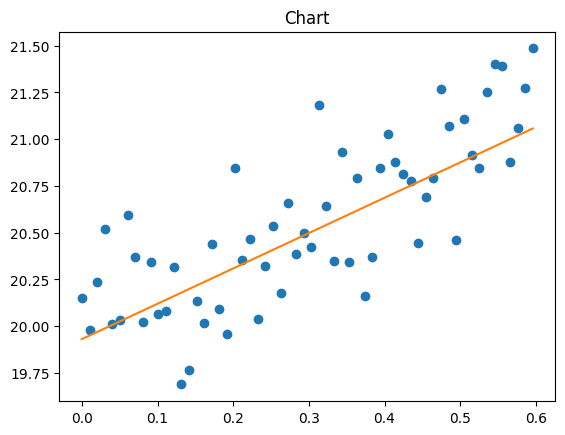

-----------------------------------------------------------------------
a: 20.031158426866526
b: 1.9234801516513034
Loss func value: 0.07612660521236382
Iteration: 91


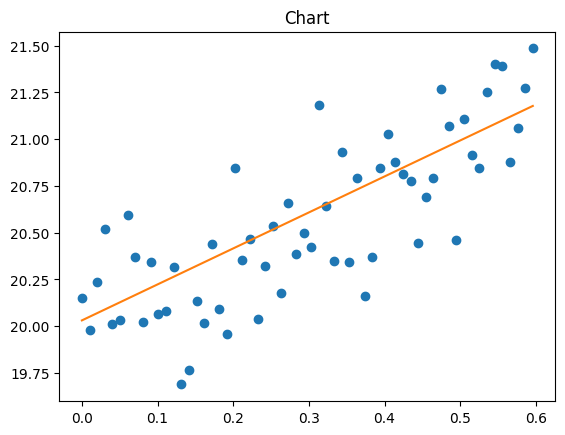

-----------------------------------------------------------------------
a: 19.9326021937629
b: 1.897158635379383
Loss func value: 0.0759062698530958
Iteration: 92


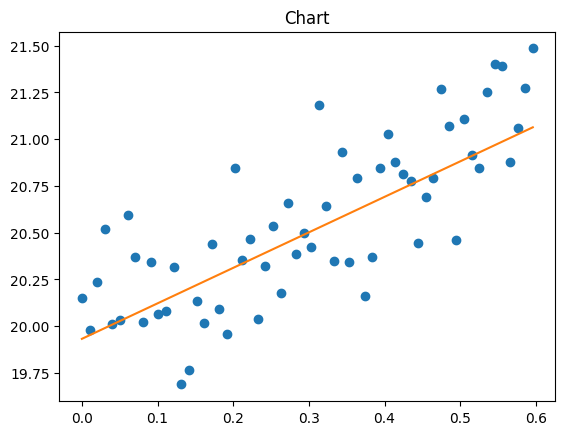

-----------------------------------------------------------------------
a: 20.025565084428255
b: 1.929355767360388
Loss func value: 0.0757017559335036
Iteration: 93


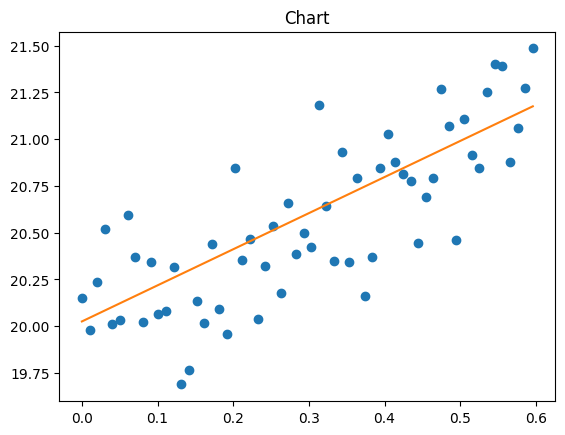

-----------------------------------------------------------------------
a: 19.93392540110592
b: 1.9047716077353147
Loss func value: 0.07551191599222068
Iteration: 94


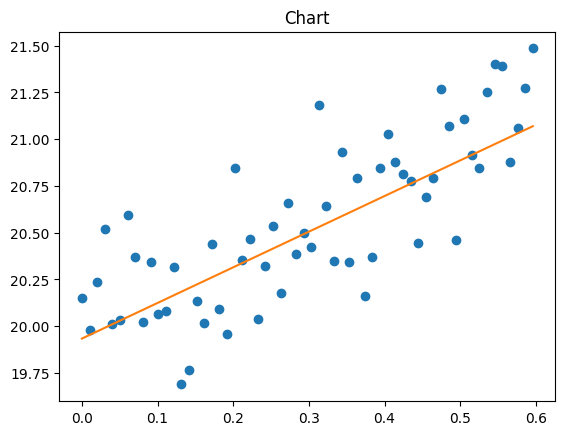

-----------------------------------------------------------------------
a: 20.020423197017458
b: 1.9346229410880749
Loss func value: 0.07533568687817839
Iteration: 95


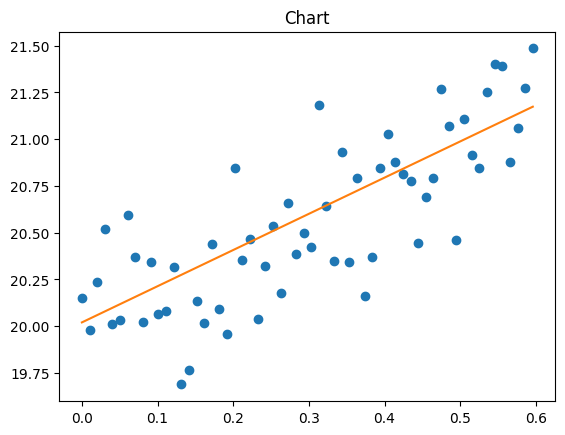

-----------------------------------------------------------------------
a: 19.93521379058063
b: 1.9116647522728571
Loss func value: 0.07517208345256217
Iteration: 96


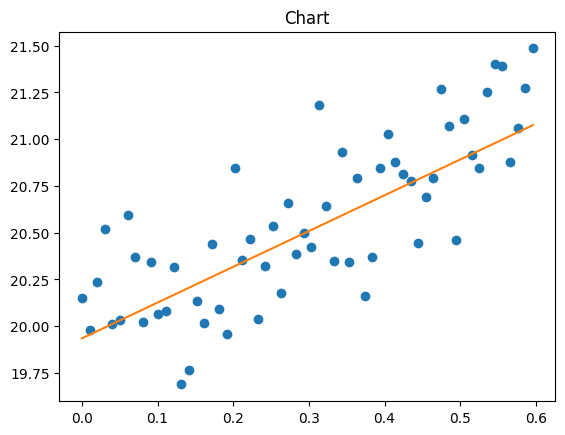

-----------------------------------------------------------------------
a: 20.015695253367536
b: 1.9393436578152805
Loss func value: 0.07502019277090986
Iteration: 97


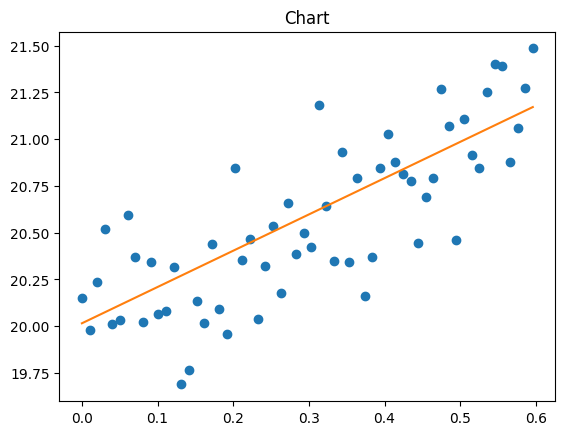

-----------------------------------------------------------------------
a: 19.936464124710536
b: 1.9179068526681589
Loss func value: 0.07487916870784646
Iteration: 98


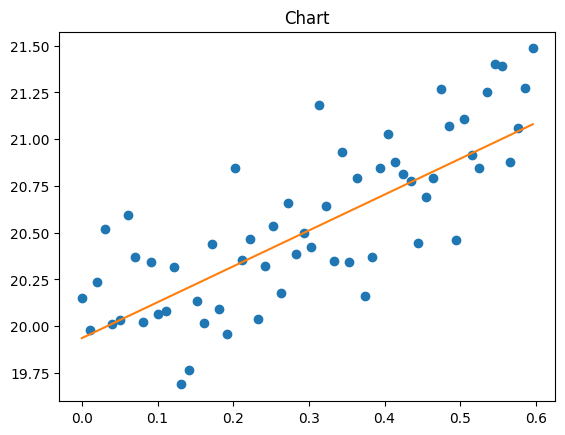

-----------------------------------------------------------------------
a: 20.011346950397034
b: 1.943573655613988
Loss func value: 0.07474822698997864
Iteration: 99


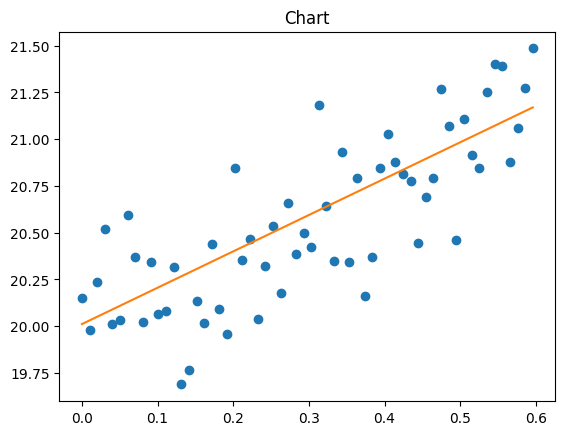

-----------------------------------------------------------------------
a: 19.93767395008582
b: 1.9235600674367859
Loss func value: 0.07462664060520097
Iteration: 100


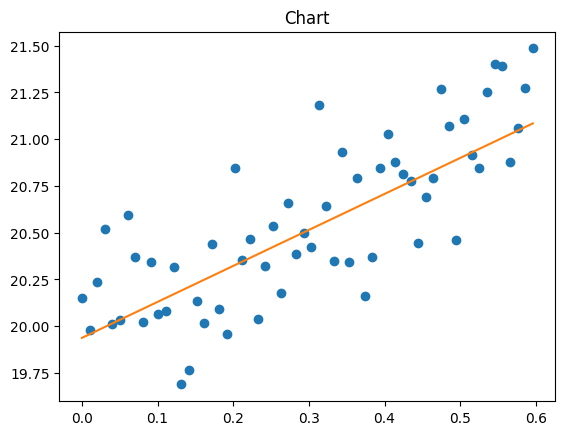

-----------------------------------------------------------------------
a: 20.007346911266367
b: 1.94736305064144
Loss func value: 0.07451373555927443
Iteration: 101


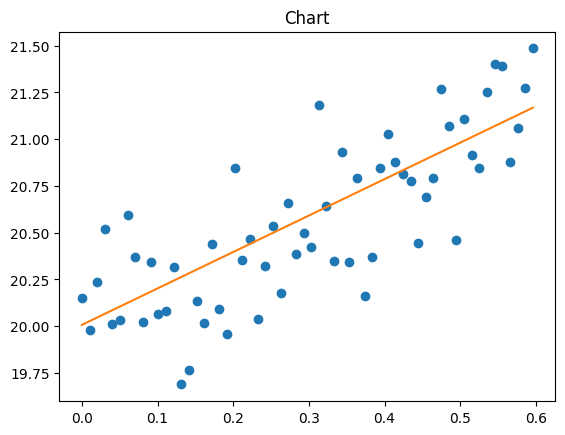

-----------------------------------------------------------------------
a: 19.938841487693804
b: 1.9286805718367084
Loss func value: 0.07440888695273419
Iteration: 102


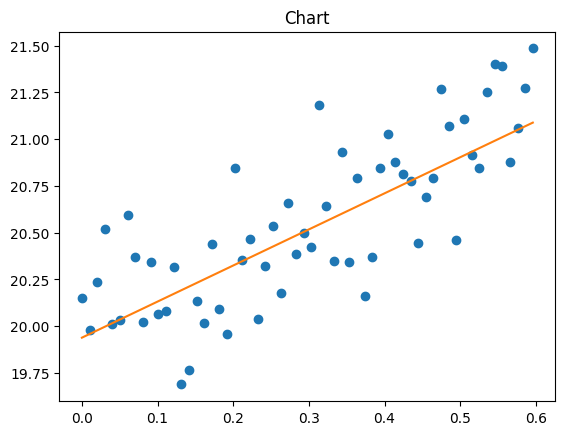

-----------------------------------------------------------------------
a: 20.003666428820015
b: 1.9507568999174898
Loss func value: 0.07431151535346256
Iteration: 103


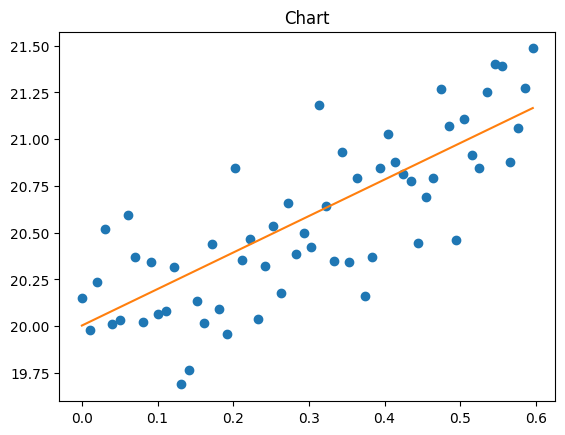

-----------------------------------------------------------------------
a: 19.939965536311927
b: 1.9333191373092278
Loss func value: 0.07422108344210604
Iteration: 104


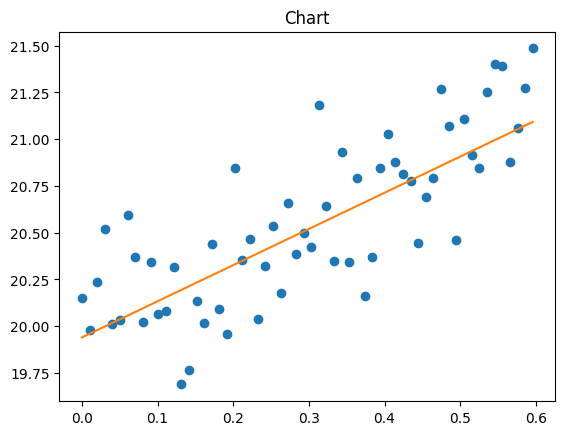

-----------------------------------------------------------------------
a: 20.000279232081162
b: 1.9537957080555313
Loss func value: 0.07413709290937928
Iteration: 105


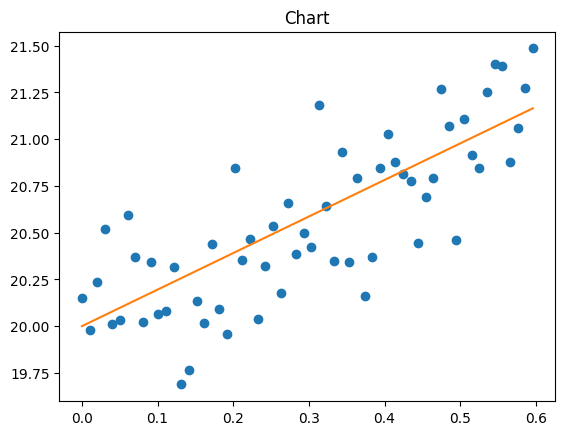

-----------------------------------------------------------------------
a: 19.941045387519893
b: 1.937521654554028
Loss func value: 0.07405908158593513
Iteration: 106


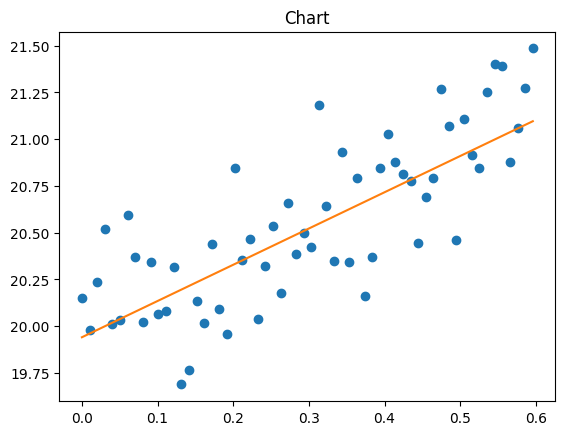

-----------------------------------------------------------------------
a: 19.997161273683474
b: 1.9565158835098786
Loss func value: 0.07398662078699501
Iteration: 107


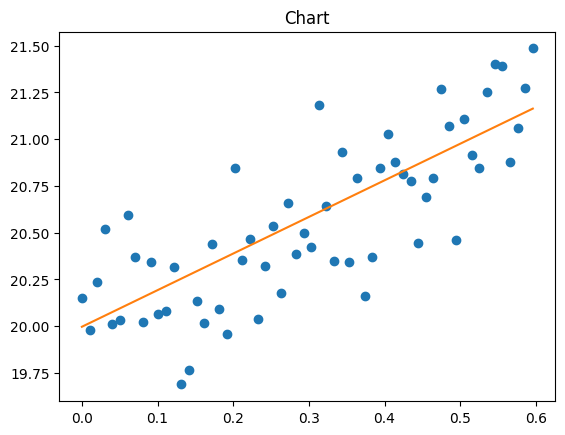

-----------------------------------------------------------------------
a: 19.942080751039786
b: 1.9413296057395402
Loss func value: 0.0739193128553326
Iteration: 108


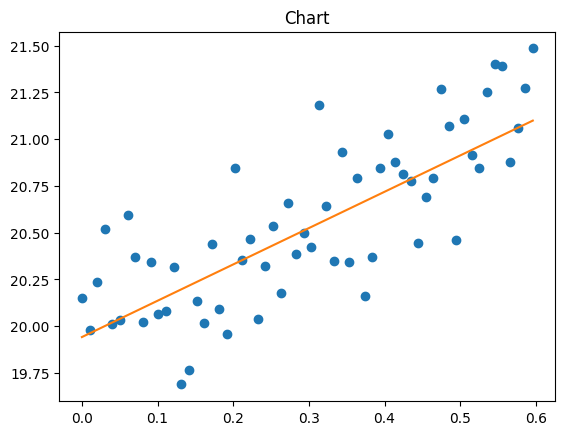

-----------------------------------------------------------------------
a: 19.9942905363226
b: 1.9589501493501107
Loss func value: 0.07385678888748586
Iteration: 109


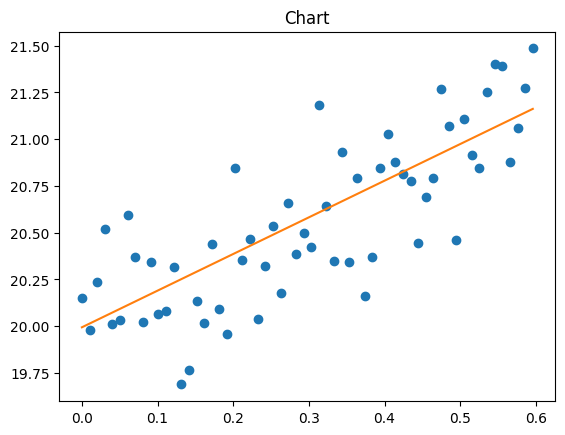

-----------------------------------------------------------------------
a: 19.943071689250562
b: 1.944780490811863
Loss func value: 0.0737987066292769
Iteration: 110


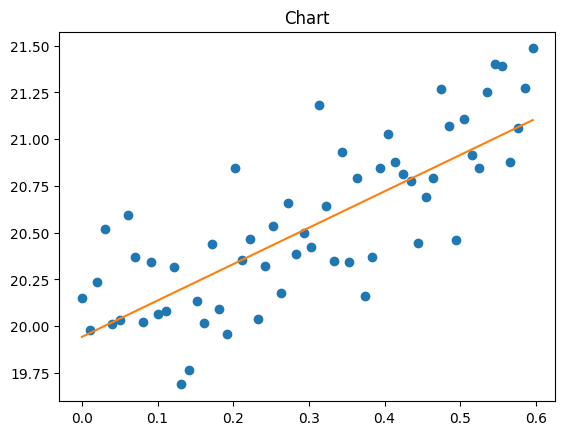

-----------------------------------------------------------------------
a: 19.991646856487915
b: 1.9611279130767936
Loss func value: 0.07374474852775975
Iteration: 111


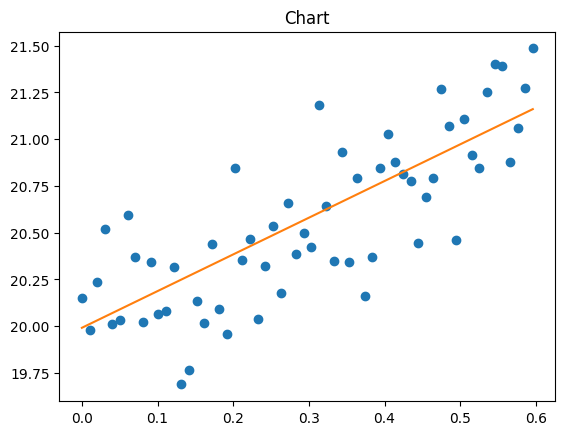

-----------------------------------------------------------------------
a: 19.944018559846718
b: 1.9479082123781497
Loss func value: 0.07369461992775021
Iteration: 112


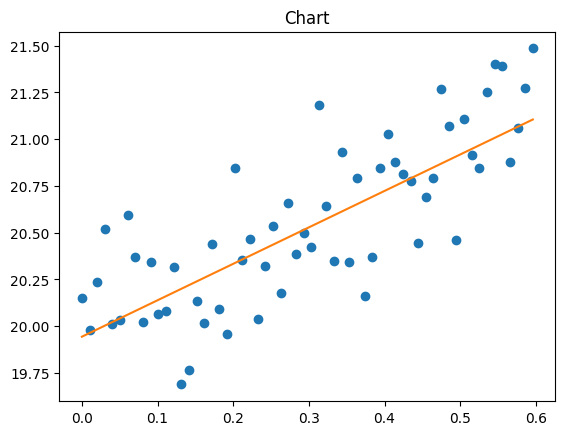

-----------------------------------------------------------------------
a: 19.989211763898158
b: 1.9630755995474547
Loss func value: 0.0736480474020122
Iteration: 113


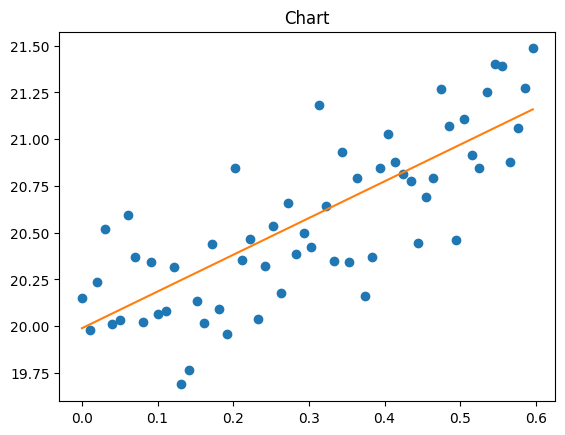

-----------------------------------------------------------------------
a: 19.94492196572064
b: 1.950743423205643
Loss func value: 0.07360477720499005
Iteration: 114


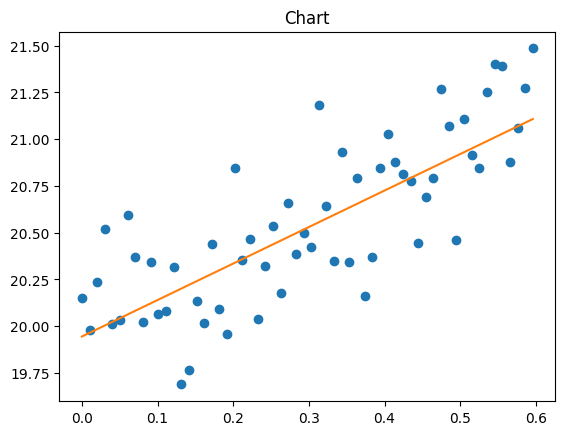

-----------------------------------------------------------------------
a: 19.986968335209713
b: 1.9648169506765842
Loss func value: 0.07356457384079701
Iteration: 115


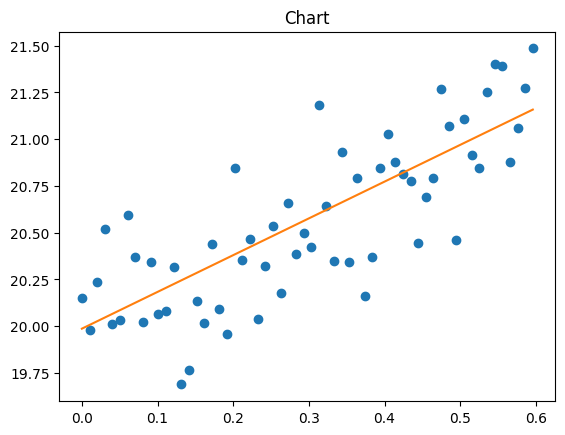

-----------------------------------------------------------------------
a: 19.94578271124759
b: 1.953313839980071
Loss func value: 0.07352721873684846
Iteration: 116


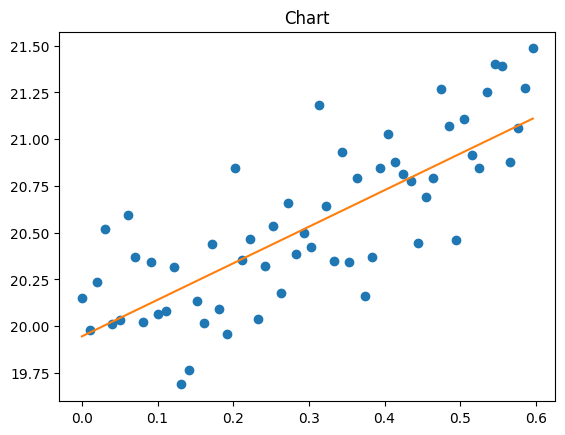

-----------------------------------------------------------------------
a: 19.984901060700064
b: 1.96637329521215
Loss func value: 0.07349250901522617
Iteration: 117


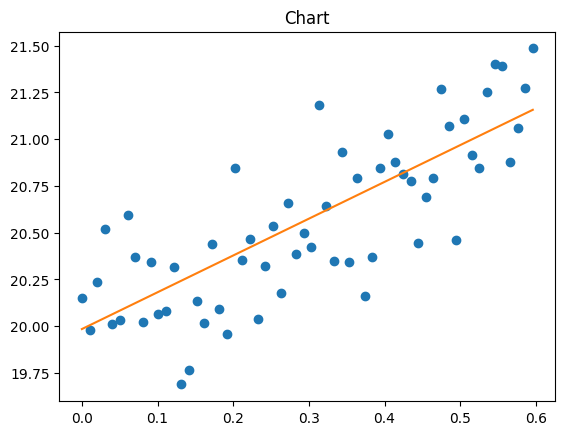

-----------------------------------------------------------------------
a: 19.946601764240775
b: 1.9556445266106937
Loss func value: 0.07346025635442156
Iteration: 118


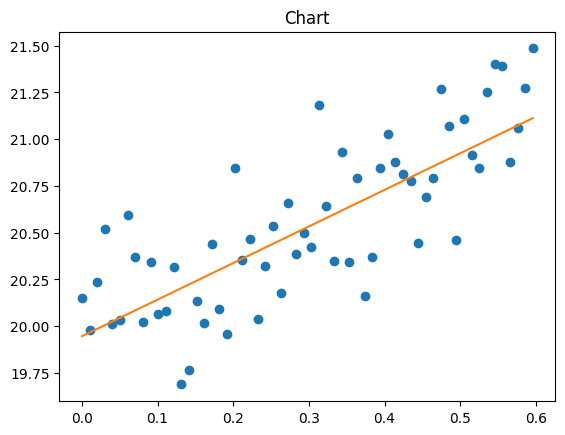

-----------------------------------------------------------------------
a: 19.982995722749095
b: 1.9677637915632111
Loss func value: 0.07343028593472684
Iteration: 119


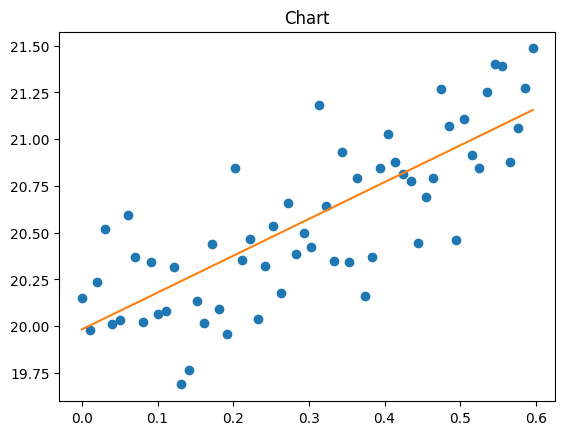

-----------------------------------------------------------------------
a: 19.947380222922334
b: 1.957758150051875
Loss func value: 0.07340243546099894
Iteration: 120


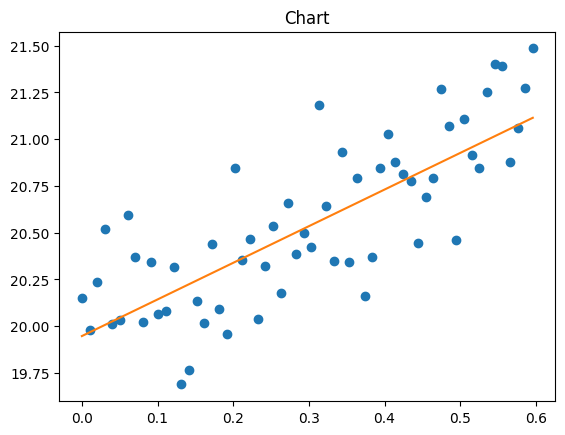

-----------------------------------------------------------------------
a: 19.981239285049003
b: 1.9690056463585524
Loss func value: 0.07337655425704162
Iteration: 121


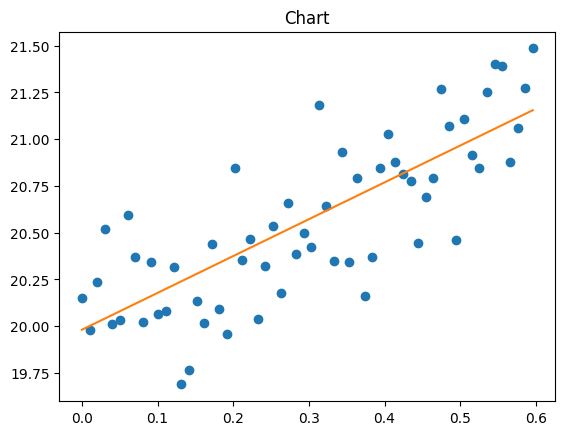

-----------------------------------------------------------------------
a: 19.948119287328563
b: 1.9596752113150036
Loss func value: 0.07335250242627382
Iteration: 122


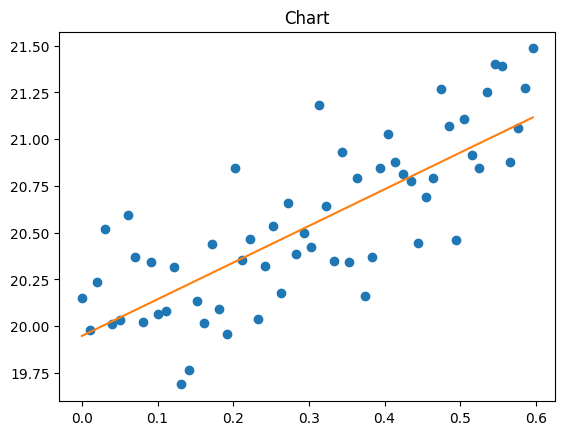

-----------------------------------------------------------------------
a: 19.979619791573796
b: 1.9701143111503612
Loss func value: 0.07333015007374083
Iteration: 123


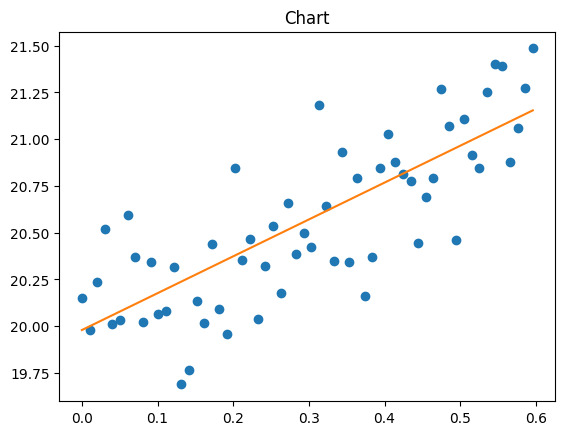

-----------------------------------------------------------------------
a: 19.948820234629498
b: 1.9614142540885076
Loss func value: 0.07330937658493561
Iteration: 124


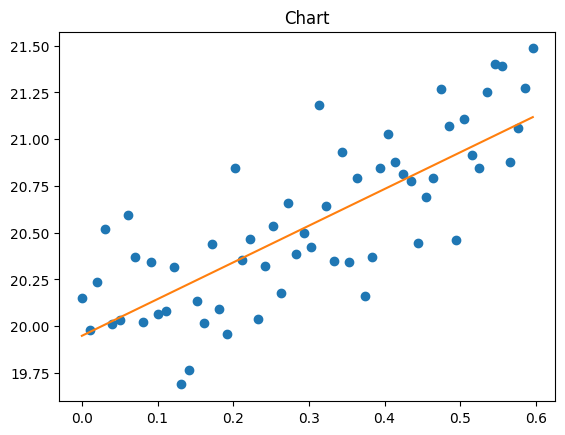

-----------------------------------------------------------------------
a: 19.97812627442726
b: 1.9711036594376246
Loss func value: 0.07329006995720973
Iteration: 125


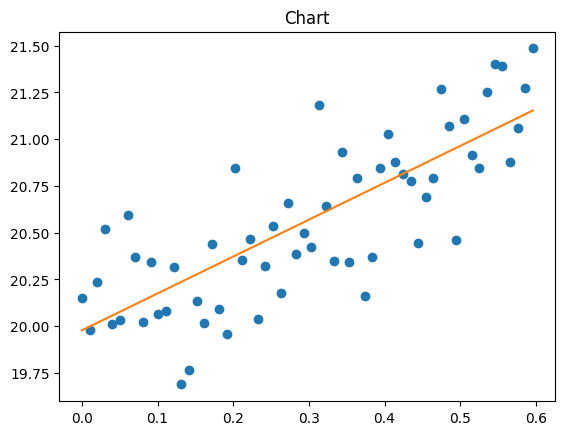

-----------------------------------------------------------------------
a: 19.949484397901745
b: 1.9629920531451144
Loss func value: 0.07327212617988028
Iteration: 126


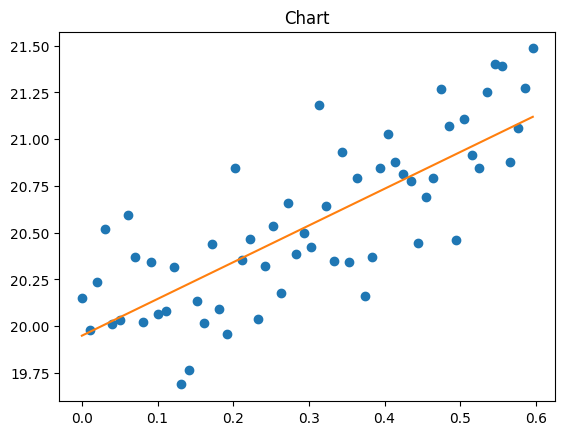

-----------------------------------------------------------------------
a: 19.97674866977
b: 1.9719861459691126
Loss func value: 0.07325544865944851
Iteration: 127


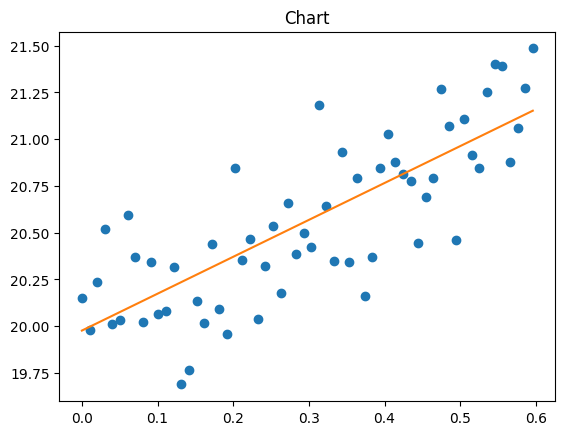

-----------------------------------------------------------------------
a: 19.950113147942474
b: 1.964423784502735
Loss func value: 0.07323994768658085
Iteration: 128


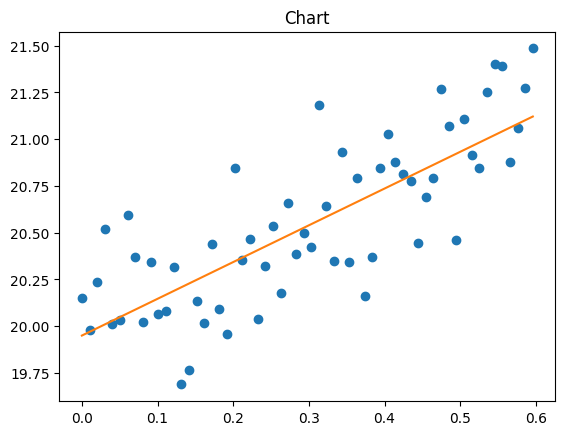

-----------------------------------------------------------------------
a: 19.97547774110016
b: 1.9727729500899622
Loss func value: 0.0732255399417953
Iteration: 129


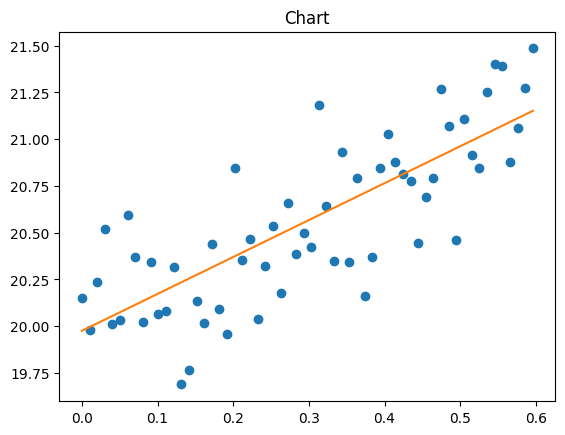

-----------------------------------------------------------------------
a: 19.950707877758976
b: 1.9657231791148813
Loss func value: 0.0732121480369943
Iteration: 130


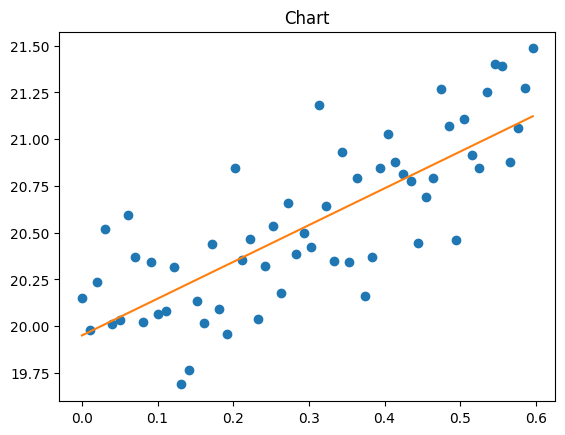

-----------------------------------------------------------------------
a: 19.974305009227706
b: 1.9734741047219981
Loss func value: 0.0731997000902141
Iteration: 131


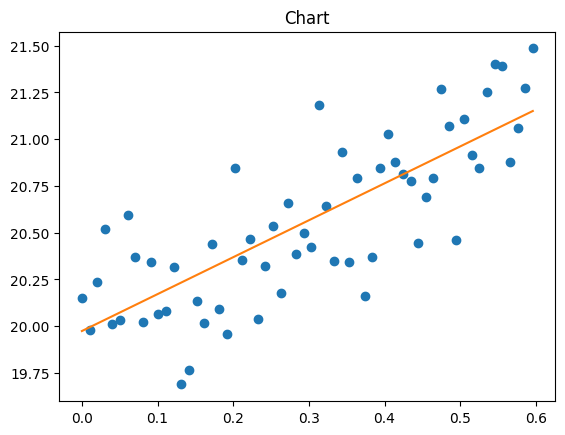

-----------------------------------------------------------------------
a: 19.951269989408843
b: 1.9669026616908707
Loss func value: 0.07318812933115466
Iteration: 132


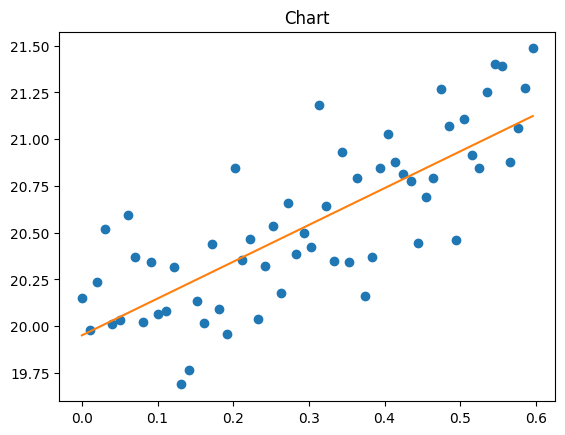

-----------------------------------------------------------------------
a: 19.973222688344322
b: 1.974098612409524
Loss func value: 0.07317737373522432
Iteration: 133


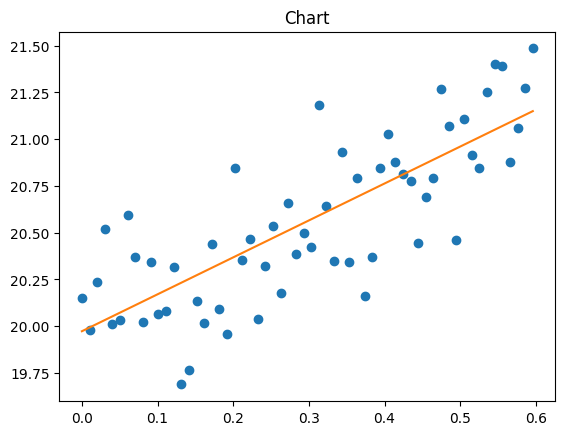

-----------------------------------------------------------------------
a: 19.95180088290135
b: 1.967973476092957
Loss func value: 0.07316737568403338
Iteration: 134


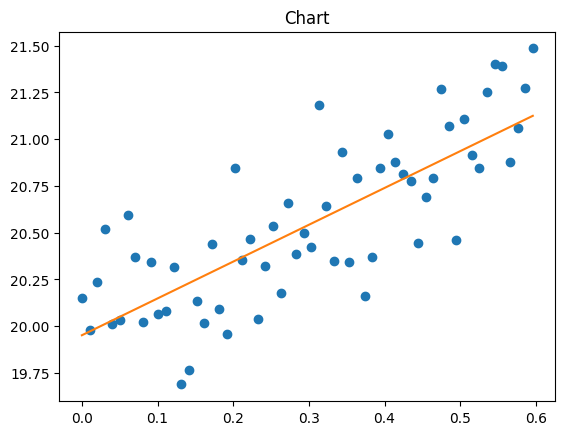

-----------------------------------------------------------------------
a: 19.972223627643743
b: 1.9746545497199173
Loss func value: 0.07315808165037757
Iteration: 135


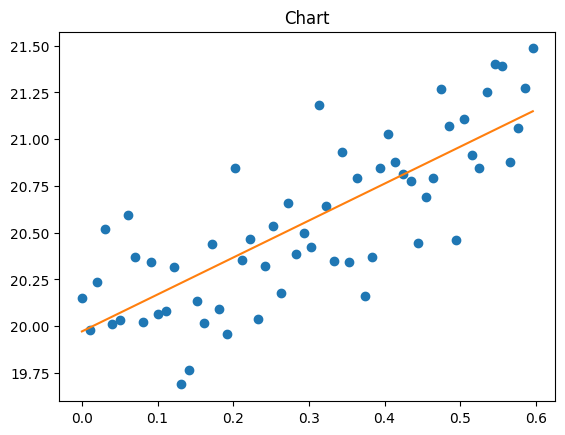

-----------------------------------------------------------------------
a: 19.95230194690442
b: 1.9689457986130745
Loss func value: 0.07314944190594512
Iteration: 136


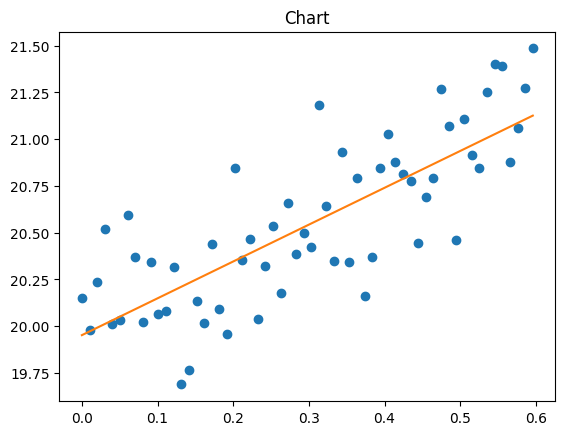

-----------------------------------------------------------------------
a: 19.9713012579987
b: 1.9751491611613836
Loss func value: 0.07314141025007594
Iteration: 137


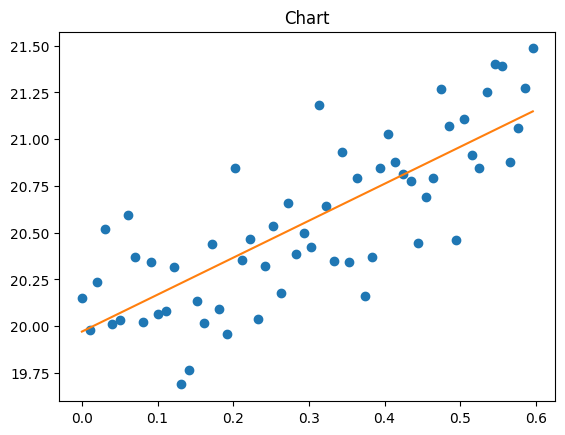

-----------------------------------------------------------------------
a: 19.95277455102912
b: 1.9698288403073407
Loss func value: 0.07313394375804717
Iteration: 138


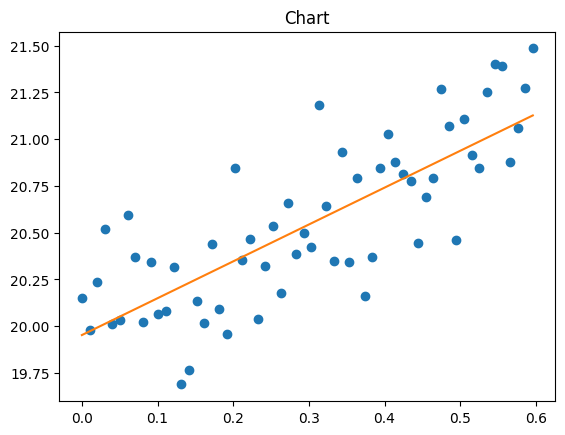

-----------------------------------------------------------------------
a: 19.97044954324472
b: 1.9755889436633927
Loss func value: 0.07312700254746153
Iteration: 139


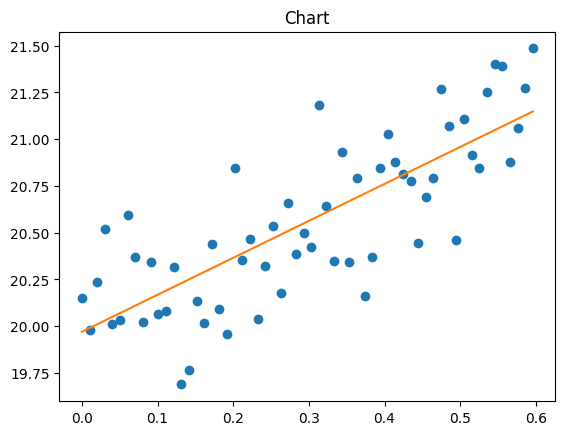

-----------------------------------------------------------------------
a: 19.95322003949032
b: 1.9706309394511259
Loss func value: 0.07312054956142437
Iteration: 140


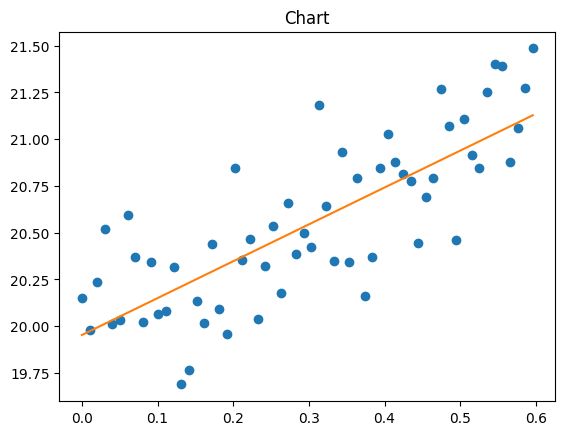

-----------------------------------------------------------------------
a: 19.969662935662278
b: 1.9759797225624762
Loss func value: 0.07311455036728669
Iteration: 141


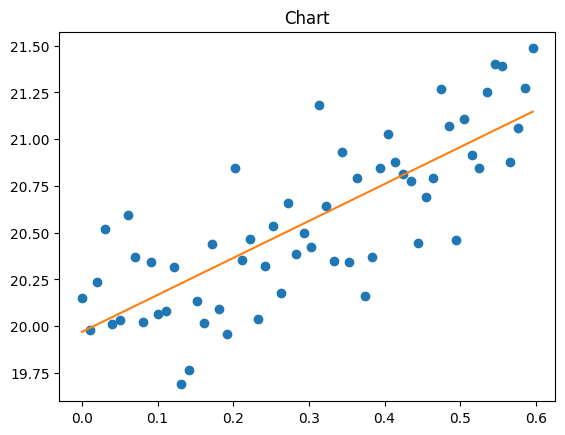

-----------------------------------------------------------------------
a: 19.95363972596495
b: 1.9713596450724642
Loss func value: 0.0731089729698319
Iteration: 142


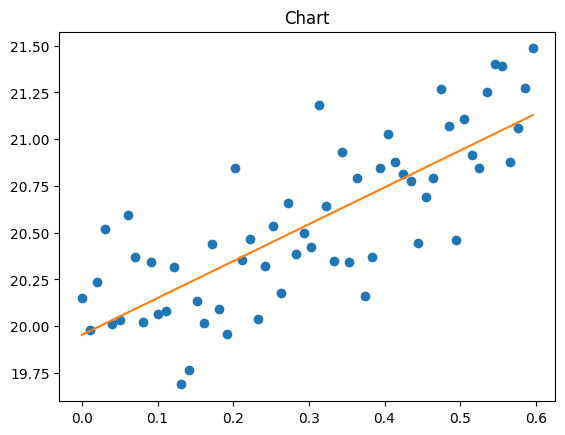

-----------------------------------------------------------------------
a: 19.968936335285672
b: 1.9763267199418937
Loss func value: 0.07310378763785279
Iteration: 143


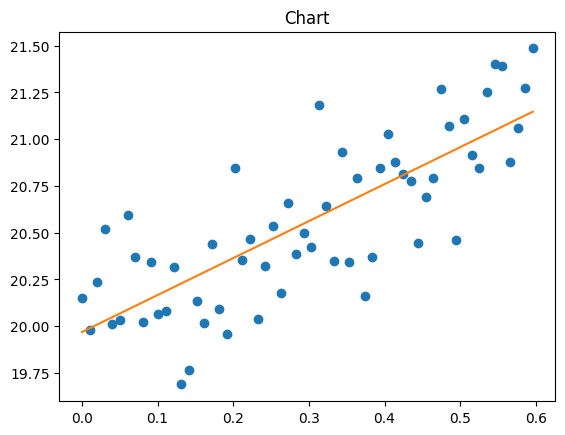

-----------------------------------------------------------------------
a: 19.954034889490014
b: 1.9720217924304204
Loss func value: 0.07309896674315565
Iteration: 144


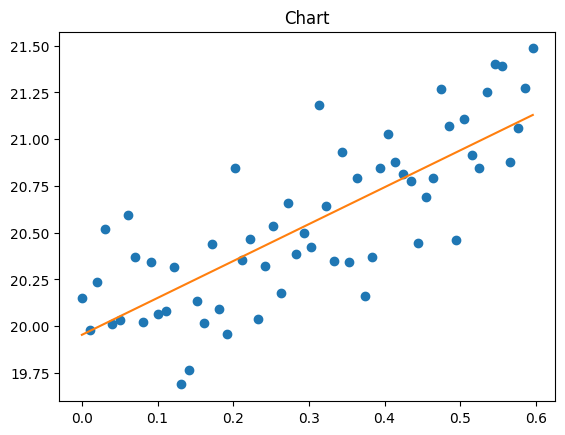

-----------------------------------------------------------------------
a: 19.968265052700897
b: 1.9766346160892654
Loss func value: 0.07309448461108718
Iteration: 145


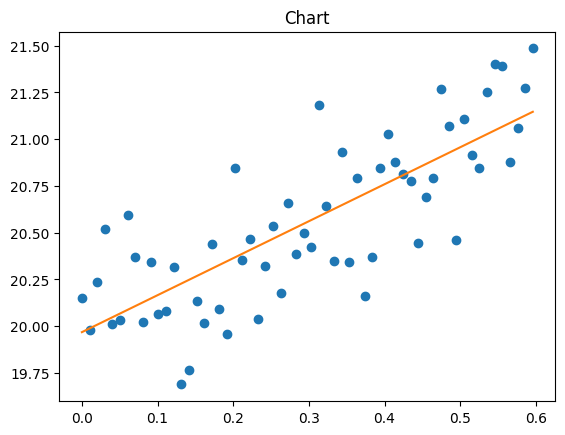

-----------------------------------------------------------------------
a: 19.954406771260572
b: 1.9726235712188271
Loss func value: 0.07309031738175815
Iteration: 146


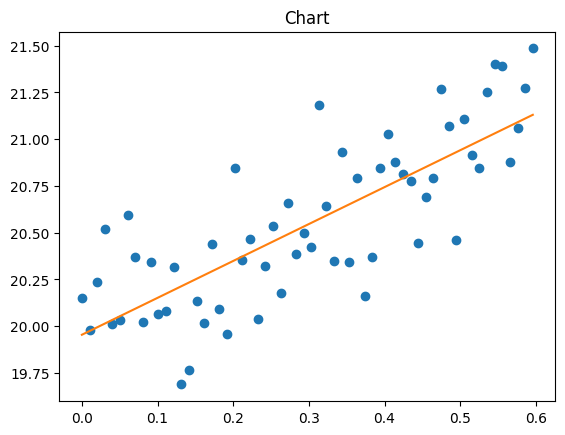

-----------------------------------------------------------------------
a: 19.967644775025224
b: 1.9769076047602587
Loss func value: 0.07308644288118499
Iteration: 147


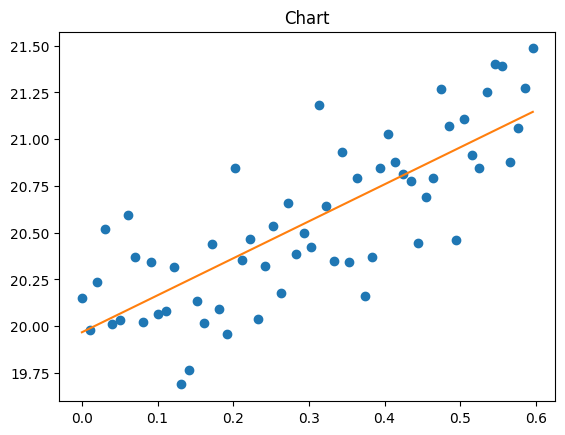

-----------------------------------------------------------------------
a: 19.954756572204886
b: 1.973170587200863
Loss func value: 0.07308284050163967
Iteration: 148


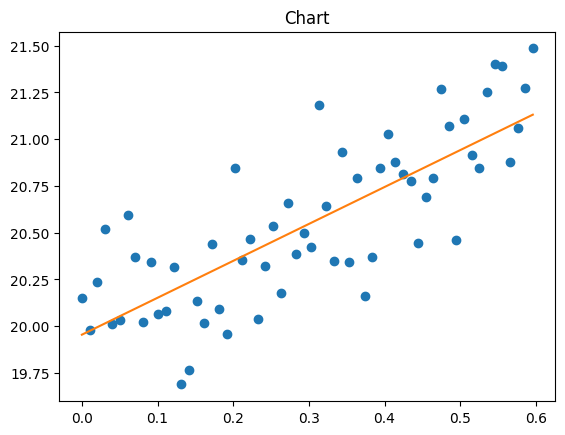

-----------------------------------------------------------------------
a: 19.967071534788502
b: 1.977149442867886
Loss func value: 0.07307949109054518
Iteration: 149


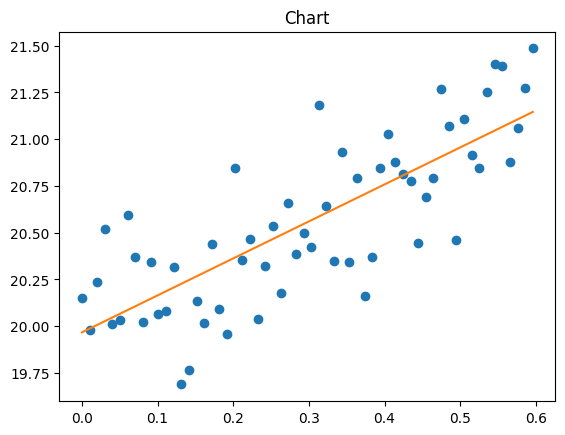

-----------------------------------------------------------------------
a: 19.955085451227443
b: 1.9736679179107335
Loss func value: 0.073076376847291
Iteration: 150


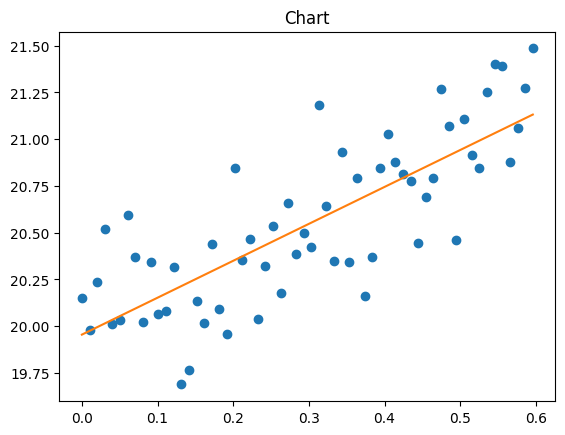

-----------------------------------------------------------------------
a: 19.966541681462413
b: 1.9773634951563113
Loss func value: 0.07307348122741653
Iteration: 151


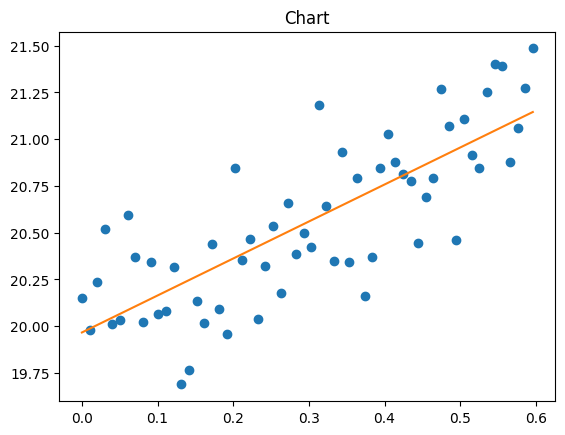

-----------------------------------------------------------------------
a: 19.95539452402452
b: 1.974120162997188
Loss func value: 0.0730707888536157
Iteration: 152


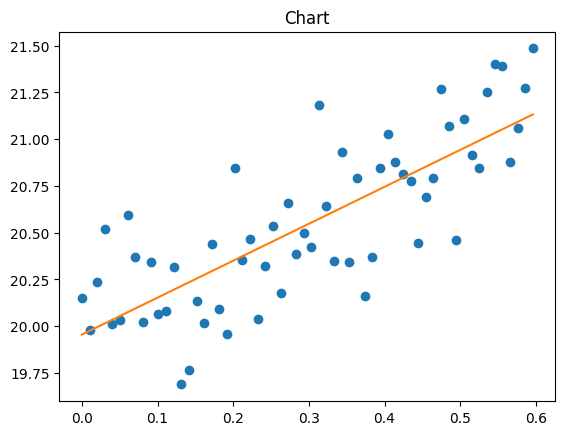

-----------------------------------------------------------------------
a: 19.966051855405663
b: 1.9775527743605215
Loss func value: 0.07306828543308254
Iteration: 153


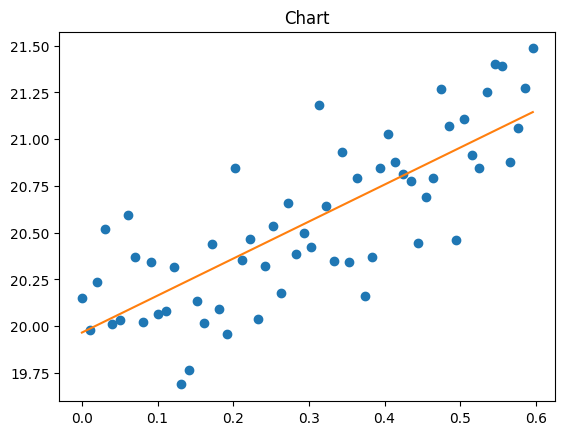

-----------------------------------------------------------------------
a: 19.955684862387653
b: 1.9745314897283137
Loss func value: 0.07306595768074343
Iteration: 154


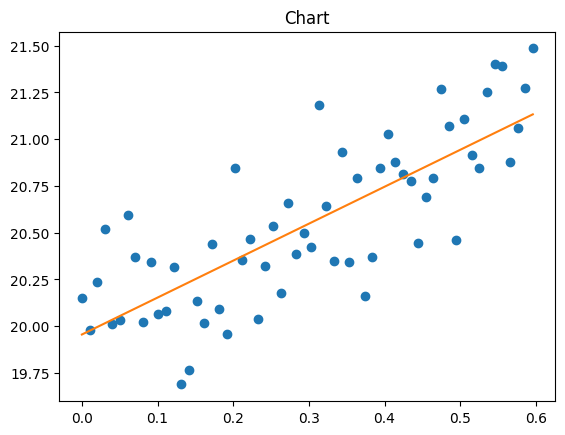

-----------------------------------------------------------------------
Accuracy cap reached.


In [10]:
# initially - horizontal line
# a = np.median(y)
# b = 0

# initially - random line
min_val = np.min(y)
max_val = np.max(y)
a = np.random.uniform(min_val, max_val)  # select random value between min and max y values
b = np.random.uniform(-10, 10)  # select random b

coefficient=0.9
acc=0.01

final_a, final_b, func_values = fastest_descent(G, d_cent_diff, gradient, a, b, coefficient, acc, max_iter=500)

# without / len(x) in loss function and coefficient >= 0.016 method loses stability
# with / len(x) in loss function and coefficient >= 0.91 method loses stability

# acc 0.1 too rough
# acc 0.01 approximately suitable
# acc 0.001 too precise - too many iteration with almost same minimum value of loss func

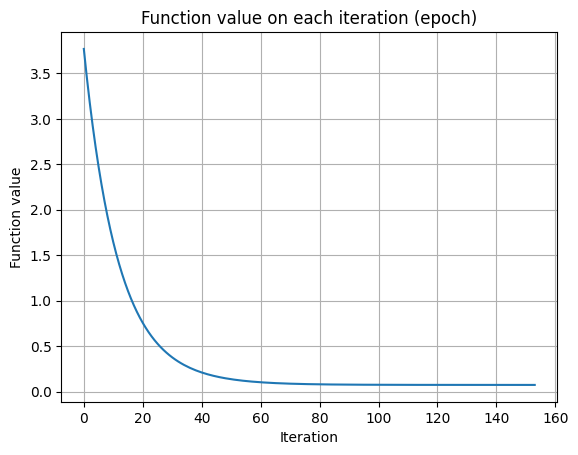

In [18]:
from matplotlib.ticker import MultipleLocator
x_values = range(len(func_values))

plt.plot(x_values, func_values)
# tick every 0.5
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.title('Function value on each iteration (epoch)')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.grid(True)
plt.show()

## Run on test dataset

In [12]:
data = np.genfromtxt('lab_1_test.csv', delimiter=',', usecols=(1, 2), skip_header=1)
x, y = data.transpose()  # override train x, y to test x, y

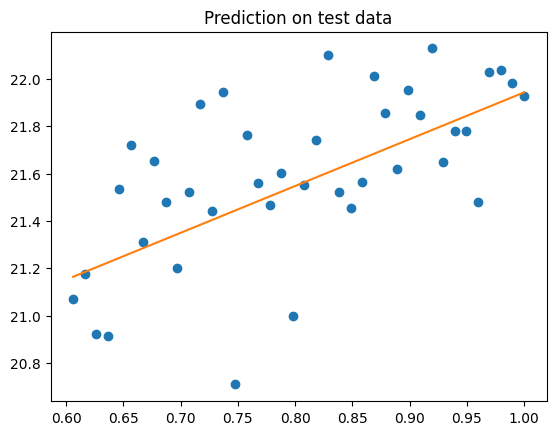

Loss function value on test data: 0.07513668409916535


In [13]:
draw_line(final_a, final_b, title='Prediction on test data')
print(f'Loss function value on test data: {G(final_a, final_b)}')

## Visualize lab_1_train.csv + lab_1_test.csv + line

In [14]:
data = np.genfromtxt('lab_1_train.csv', delimiter=',', usecols=(1, 2), skip_header=1)
x_train, y_train = data.transpose()

In [15]:
data = np.genfromtxt('lab_1_test.csv', delimiter=',', usecols=(1, 2), skip_header=1)
x_test, y_test = data.transpose()

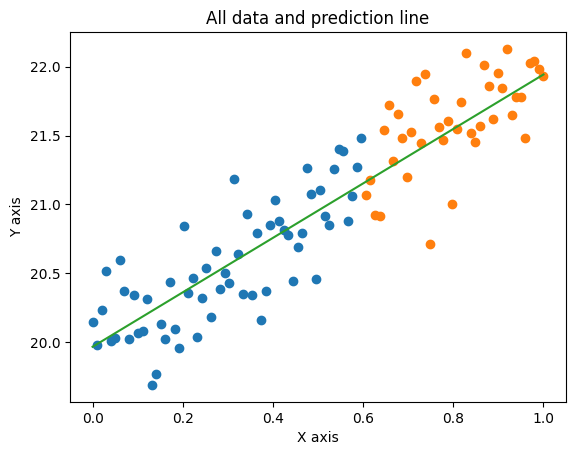

In [16]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'o')

# finiding bounds to draw a line
x_min = min(np.min(x_train), np.min(x_test))
x_max = max(np.max(x_train), np.max(x_test))

x_line = np.linspace(x_min, x_max, 2)  
y_line = final_a + final_b * x_line
plt.plot(x_line, y_line)

plt.title('All data and prediction line')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

In [17]:
x = np.concatenate([x_train, x_test])  # override test x to combined x
y = np.concatenate([y_train, y_test])  # override test y to combined y
combined_loss_value = G(final_a, final_b)
print(f'Loss function value for train and test data: {combined_loss_value}')

Loss function value for train and test data: 0.07389294958843527
